## Table of Content

1. **[About the Project](#abt)**
2. **[Problem Statement](#prob)**
3. **[Import Libraries](#lib)**
4. **[Data Cleaning](#clean)**
    - 4.1 - **[Null value treatment](#null)**
5. **[Feature Engineering](#feature)**
6. **[Power Transformations](#power)**
7. **[Outlier Removal](#outlier)**
8. **[Encoding](#encod)**
9. **[Base model building](#base_mod)**
10. **[PCA](#pca)**
11. **[VIF](#vif)**
12. **[Final model building](#final)**
13. **[Best feature_importance](#best)**

<a id="abt"></a>


### About the Project

<div align="left", style="font-size:120%">
    <font color="#2118C">
         <br>
        In this project we aim to analyse Airbnb's publicly available listing information for this year to * predict their room/flat/villa prices * based on location, amenities provided etc. Thus, providing Airbnb owners and customers with undeniable advantages of marketing strategy planning, revenue forecasting, purchase decision, action plan for near future and many more </br>
</div>

<a id="prob"></a>
### Problem Statement
<div align="left", style="font-size:120%">
    <font color="#2118C">
         <br>
We acquired Airbnb 2021 dataset for 28 prominent cities of USA. 
With this dataset we aim to develop a reliable price prediction model using machine learning and data processing techniques to aid new property owners with pricing of their property with aim to make the pricing both competitive and profitable for the new owner. 
</div>

<a id="lib"></a>
## Import library

In [2]:
# basic lib.
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#import klib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
%pylab inline
#########################################################################
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from  sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm 




Populating the interactive namespace from numpy and matplotlib


In [2]:
# for changing defaut pandas view options
#set option 
pd.set_option('display.max_rows', 100)   # max row --> will show 100 row , none --< all 
pd.set_option('display.max_columns', None) # max colum
#pd.set_option('display.width', None) # max widh in coolum
#pd.set_option('display.max_colwidth', -1) # max col width
pd.options.display.float_format = '{:.5f}'.format  # to get rid off e to the power value
# to reset all 
#pd.reset_option('all')

### import the dataset

In [9]:
#read csv
df = pd.read_csv('AirBnB_US_2021.csv' ,index_col = 0 )
print(df.shape)

(201709, 75)


In [4]:
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,City
0,108061,https://www.airbnb.com/rooms/108061,20210710190015,2021-07-10,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental in...,"I love my neighborhood! Its friendly, easy-goi...",https://a0.muscache.com/pictures/41011975/0cdf...,320564,https://www.airbnb.com/users/show/320564,Lisa,2010-12-16,"Asheville, North Carolina, United States",I am a long time resident of Asheville and am ...,within a day,67%,25%,f,https://a0.muscache.com/im/users/320564/profil...,https://a0.muscache.com/im/users/320564/profil...,NaN,2.00000,2.00000,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Asheville, North Carolina, United States",28801,NaN,35.60670,-82.55563,Entire apartment,Entire home/apt,2,NaN,1 bath,1.00000,1.00000,"[""Microwave"", ""Free parking on premises"", ""Ded...",$82.00,30,365,30.00000,30.00000,1125.00000,1125.00000,30.00000,1125.00000,NaN,t,0,1,1,217,2021-07-10,89,0,0,2011-09-21,2019-11-30,4.49000,4.57000,4.70000,4.85000,4.79000,4.84000,4.48000,NaN,f,2,2,0,0,0.75000,Ashville
1,155305,https://www.airbnb.com/rooms/155305,20210710190015,2021-07-10,Cottage! BonPaul + Sharky's Hostel,<b>The space</b><br />Private cottage located ...,"We are within easy walk of pubs, breweries, mu...",https://a0.muscache.com/pictures/8880711/cf38d...,746673,https://www.airbnb.com/users/show/746673,BonPaul,2011-06-26,"Asheville, North Carolina, United States",We operate two traveler's hostels located in H...,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/4dff7...,https://a0.muscache.com/im/pictures/user/4dff7...,NaN,7.00000,7.00000,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Asheville, North Carolina, United States",28806,NaN,35.57864,-82.59578,Entire guesthouse,Entire home/apt,2,NaN,1 bath,1.00000,1.00000,"[""Stove"", ""Microwave"", ""Free parking on premis...",$91.00,1,365,1.00000,1.00000,7.00000,1125.00000,1.00000,201.70000,NaN,t,13,33,48,130,2021-07-10,319,70,9,2016-08-29,2021-07-10,4.57000,4.68000,4.38000,4.81000,4.76000,4.92000,4.51000,NaN,t,7,1,2,4,5.39000,Ashville


In [11]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.017090e+05,2.017090e+05,2.017090e+05,201392.000000,201392.000000,201709.000000,201709.000000,201709.000000,0.0,181128.00000,...,156596.000000,156548.000000,156582.000000,156541.000000,156536.000000,201709.000000,201709.000000,201709.000000,201709.000000,158233.000000
mean,3.051503e+07,2.021075e+13,1.134737e+08,60.270239,60.270239,35.093554,-103.883212,3.989648,NaN,1.71815,...,4.724805,4.857149,4.845567,4.809948,4.698717,19.721604,16.444120,2.676246,0.196337,2.389993
std,1.554074e+07,4.571451e+07,1.186272e+08,278.829660,278.829660,6.812222,26.427877,2.721040,NaN,1.10872,...,0.455192,0.367817,0.388339,0.354886,0.437959,50.057520,46.713925,15.422925,2.380596,5.388211
min,1.090000e+02,2.021071e+13,2.300000e+01,0.000000,0.000000,18.920250,-159.714620,0.000000,NaN,1.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.780608e+07,2.021071e+13,1.696384e+07,1.000000,1.000000,32.712070,-118.478990,2.000000,NaN,1.00000,...,4.670000,4.860000,4.850000,4.770000,4.630000,1.000000,1.000000,0.000000,0.000000,0.300000
50%,3.268752e+07,2.021072e+13,6.406559e+07,2.000000,2.000000,36.131090,-104.904990,4.000000,NaN,1.00000,...,4.870000,4.970000,4.970000,4.920000,4.810000,2.000000,1.000000,0.000000,0.000000,1.020000
75%,4.522367e+07,2.021080e+13,1.800072e+08,11.000000,11.000000,40.703770,-77.029810,5.000000,NaN,2.00000,...,5.000000,5.000000,5.000000,5.000000,4.940000,10.000000,5.000000,1.000000,0.000000,2.750000
max,5.150898e+07,2.021081e+13,4.168894e+08,3966.000000,3966.000000,47.734010,-70.997810,16.000000,NaN,23.00000,...,5.000000,5.000000,5.000000,5.000000,5.000000,399.000000,399.000000,276.000000,75.000000,250.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201709 entries, 0 to 8032
Data columns (total 75 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            201709 non-null  int64  
 1   listing_url                                   201709 non-null  object 
 2   scrape_id                                     201709 non-null  int64  
 3   last_scraped                                  201709 non-null  object 
 4   name                                          201691 non-null  object 
 5   description                                   197088 non-null  object 
 6   neighborhood_overview                         130478 non-null  object 
 7   picture_url                                   201708 non-null  object 
 8   host_id                                       201709 non-null  int64  
 9   host_url                                      2017

In [13]:
# Remane the city column
df.rename(columns = {'City':'city'} , inplace =True)

In [14]:
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,108061,https://www.airbnb.com/rooms/108061,20210710190015,2021-07-10,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental in...,"I love my neighborhood! Its friendly, easy-goi...",https://a0.muscache.com/pictures/41011975/0cdf...,320564,https://www.airbnb.com/users/show/320564,...,4.84,4.48,NaN,f,2,2,0,0,0.75,Ashville
1,155305,https://www.airbnb.com/rooms/155305,20210710190015,2021-07-10,Cottage! BonPaul + Sharky's Hostel,<b>The space</b><br />Private cottage located ...,"We are within easy walk of pubs, breweries, mu...",https://a0.muscache.com/pictures/8880711/cf38d...,746673,https://www.airbnb.com/users/show/746673,...,4.92,4.51,NaN,t,7,1,2,4,5.39,Ashville


In [19]:
# creating a bcakup copy of main dataframe
df_new = df.copy()
# all the updates have been done on this dataframe, the original dataFrame is untouched

#### using the domain knnowledge we have prepared the list of useful column and removed the columns which does not related to our project
#### list of useful variable is noted down in excel file for dyanamic use

In [20]:
df_useful_col = pd.read_excel('df_useful_col.xlsx'  , header =None ,names = ['useful_col'])
df_useful_col = df_useful_col.useful_col.to_list()
df_useful_col

['host_id',
 'host_since',
 'host_location',
 'host_response_time',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'room_type',
 'accommodates',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'reviews_per_month',
 'city',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'last_scraped',
 'calculated_host_listings_count_entire_homes']

In [21]:
len(df_useful_col)

43

Creating a dataframe for useful columns only 

In [22]:
df_fin = df.loc[:,df_useful_col]

In [23]:
# taking a backup

df_new = df_fin.copy(deep=True)

In [24]:
df_new.shape

(201709, 43)

<a id="clean"></a>

# Data Cleaning 

* Once we able to get correct data we are moving into Data Cleaning part

<a id="null"></a>

## Null value treatment 

we will the null value present in the dataset

In [25]:
df_null = pd.DataFrame()
df_null['count'] = df_new.isnull().sum(axis = 0)
df_null['% age of null value'] = df_new.isnull().sum(axis = 0)/df_new.shape[0]*100
df_null.sort_values(by = 'count' , ascending = False)

,count,% age of null value
neighbourhood_group_cleansed,103140,51.133068
neighbourhood,71227,35.311761
review_scores_value,45173,22.395134
review_scores_location,45168,22.392655
review_scores_checkin,45161,22.389184
review_scores_accuracy,45129,22.373320
review_scores_communication,45127,22.372328
review_scores_cleanliness,45113,22.365388
host_response_time,44715,22.168074
review_scores_rating,43476,21.553823


##### as per our project requirment we are droping columns and row which has more than 30% null value.

In [26]:
drop_cols = list(df_null[df_null['% age of null value'] > 30].index)

In [27]:
drop_cols
# row having more the 30% null values

['neighbourhood', 'neighbourhood_group_cleansed']

* we can consider dropping these columns from the dataframe 

In [29]:
len(drop_cols)
# to columns have more than 30% null values 

2

#### Dropping the columns 

In [30]:
df_new = df_new.drop(drop_cols, axis = 1)

In [31]:
df_new.shape

(201709, 41)

##### df_null_rows is the dataFrame containing the null values in each row

In [33]:
df_null_rows = pd.DataFrame()
df_null_rows['count'] = df_new.isnull().sum(axis =1)
df_null_rows['% age of null value'] = df_new.isnull().sum(axis =1)/df_new.shape[1] * 100
df_null_rows.sort_values(by = 'count' , ascending = False)

,count,% age of null value
8235,17,41.463415
2043,17,41.463415
6638,17,41.463415
25101,17,41.463415
6639,17,41.463415
...,...,...
10792,0,0.000000
10793,0,0.000000
10008,0,0.000000
7220,0,0.000000


In [34]:
# creating list of row having null values more than 30%
drop_rows = list(df_null_rows[df_null_rows['% age of null value'] > 30].index)

In [35]:
len(drop_rows)
# total rows have more than 30% null values.

302

###### droping row having more than 30% null values

In [37]:
df_new = df_new.drop(drop_rows, axis = 0)

In [38]:
df_new.shape
# shape of the dataFrame after removing 30% null values from columns as well as rows

(198949, 41)

### finding columns with null values which needs imputation

In [39]:
def isnull_count(df):
    return df.isnull().sum()/len(df)*100

In [40]:
isnull_count(df_new)[isnull_count(df_new)>0]

host_since                      0.023122
host_location                   0.212115
host_response_time             22.040825
host_acceptance_rate           20.918426
host_is_superhost               0.023122
host_listings_count             0.023122
host_total_listings_count       0.023122
host_identity_verified          0.023122
bathrooms_text                  0.131189
bedrooms                       10.151848
beds                            1.796943
review_scores_rating           21.490935
review_scores_accuracy         22.310240
review_scores_cleanliness      22.302198
review_scores_checkin          22.326827
review_scores_communication    22.309738
review_scores_location         22.329843
review_scores_value            22.332357
reviews_per_month              21.490935
dtype: float64

In [41]:
to_be_imputed = list(isnull_count(df_new)[isnull_count(df_new)>0].index)

In [75]:
to_be_imputed

['host_since',
 'host_location',
 'host_response_time',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_identity_verified',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [76]:
len(to_be_imputed)

19

In [77]:
# created a dataframe of null values which need to be imputed 
df_to_be_imputed = df_new[to_be_imputed]
df_to_be_imputed

,host_since,host_location,host_response_time,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,bathrooms_text,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2010-12-16,"Asheville, North Carolina, United States",within a day,25%,f,2.0,2.0,t,1 bath,1.0,1.0,4.49,4.57,4.70,4.85,4.79,4.84,4.48,0.75
1,2011-06-26,"Asheville, North Carolina, United States",within an hour,99%,t,7.0,7.0,t,1 bath,1.0,1.0,4.57,4.68,4.38,4.81,4.76,4.92,4.51,5.39
2,2011-06-26,"Asheville, North Carolina, United States",within an hour,99%,t,7.0,7.0,t,2.5 shared baths,1.0,1.0,4.52,4.73,4.43,4.76,4.61,4.84,4.46,3.09
3,2011-06-26,"Asheville, North Carolina, United States",within an hour,99%,t,7.0,7.0,t,2.5 shared baths,1.0,6.0,4.70,4.81,4.65,4.84,4.80,4.78,4.79,3.47
4,2011-07-02,"Asheville, North Carolina, United States",NaN,NaN,f,1.0,1.0,f,1 bath,1.0,1.0,4.96,4.77,4.98,4.94,4.88,4.90,4.85,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8028,2020-08-03,US,NaN,NaN,f,0.0,0.0,f,1 bath,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8029,2020-07-29,"Houston, Texas, United States",within an hour,83%,f,125.0,125.0,t,2 baths,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8030,2016-04-27,"Washington, District of Columbia, United States",within an hour,84%,f,32.0,32.0,t,1 bath,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8031,2020-09-23,"Houston, Texas, United States",within an hour,95%,f,2232.0,2232.0,t,1 bath,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Imputing the categorical Columns 

* **'host_since'**

In [78]:
# this is catergorical column so we have imputed with the mode. 

(df_new['host_since']).mode()

0    2016-12-16
dtype: object

In [79]:
df_new['host_since'] = df_new['host_since'].fillna('2016-12-16')

* **'host_location'**

we have considered that if host location is not define so by default it means that he is living in same city 
where his propert is listed.

In [80]:
df_new['host_location'] = df_new['host_location'].fillna(df_new.city)

* **host_is_superhost**

imputed with mode 

In [81]:
df_new['host_is_superhost'].value_counts(dropna = False)

f      132213
t       66690
NaN        46
Name: host_is_superhost, dtype: int64

In [82]:
df_new['host_is_superhost'] = df_new['host_is_superhost'].fillna('f')
# imputed with mode

* **host_identity_verified**

imputed with mode

In [83]:
df_new['host_identity_verified'].value_counts(dropna = False)

t      161835
f       37068
NaN        46
Name: host_identity_verified, dtype: int64

In [84]:
df_new['host_identity_verified'] = df_new['host_identity_verified'].fillna('t')
# imputed with mode

* **bathrooms_text**

imputed with mode

In [86]:
df_new['bathrooms_text'].value_counts(dropna = False)

1 bath             93741
2 baths            32361
1 shared bath      21660
1 private bath     14741
1.5 baths           6896
                   ...  
25 baths               1
21 baths               1
19 baths               1
20 baths               1
50 shared baths        1
Name: bathrooms_text, Length: 64, dtype: int64

In [87]:
df_new['bathrooms_text'] = df_new['bathrooms_text'].fillna('1 bath')
# imputed with mode

* **bedrooms** 

imputed with mode

In [88]:
df_new['bedrooms'].value_counts(dropna = False)

1.0     104378
2.0      41719
NaN      20197
3.0      19535
4.0       8484
5.0       2872
6.0        972
7.0        331
8.0        247
9.0         87
10.0        53
12.0        27
11.0        16
14.0         9
13.0         5
16.0         5
15.0         4
21.0         2
18.0         2
23.0         1
17.0         1
22.0         1
19.0         1
Name: bedrooms, dtype: int64

In [89]:
df_new['bedrooms'] = df_new['bedrooms'].fillna(1)

* **beds**

imputed with mode

In [90]:
df_new['beds'].value_counts(dropna = False)

1.0      83101
2.0      50312
3.0      24976
4.0      15302
5.0       6500
0.0       5918
6.0       3788
NaN       3575
7.0       1842
8.0       1402
9.0        653
10.0       489
11.0       257
12.0       241
13.0       132
14.0       121
16.0        80
15.0        64
18.0        31
19.0        27
17.0        23
20.0        21
21.0        19
22.0        13
26.0        11
24.0         9
27.0         6
32.0         5
23.0         4
25.0         3
29.0         3
50.0         3
38.0         2
30.0         2
28.0         1
46.0         1
42.0         1
55.0         1
40.0         1
34.0         1
61.0         1
31.0         1
33.0         1
70.0         1
132.0        1
39.0         1
36.0         1
56.0         1
Name: beds, dtype: int64

In [91]:
df_new['beds'] = df_new['beds'].fillna(1)

* **host_response_time**

host_response_time is imputed considering host_id, if host_id has multiple listings and one of the listing has response time but other listing does not have that then we will impute it with the response time of the available listing else we impute it with the mode of listing.

In [92]:
df_new['host_response_time'].unique()

array(['within a day', 'within an hour', nan, 'within a few hours',
       'a few days or more'], dtype=object)

In [93]:
df_new['host_id'].unique()

array([   320564,    746673,    769252, ...,  80447391,   1934857,
       360380092], dtype=int64)

In [94]:
response_count = pd.crosstab(index= df_new['host_id'],columns = df_new['host_response_time'])

In [95]:
response_count

host_response_time,a few days or more,within a day,within a few hours,within an hour
host_id,,,,
23,0,2,0,0
615,0,0,0,1
666,0,0,0,2
908,0,0,15,0
933,0,0,2,0
...,...,...,...,...
415509559,0,0,3,0
415516728,0,0,1,0
415664843,0,0,1,0


In [96]:
response_count.idxmax(axis = 1)

host_id
23                 within a day
615              within an hour
666              within an hour
908          within a few hours
933          within a few hours
                    ...        
415509559    within a few hours
415516728    within a few hours
415664843    within a few hours
415730082        within an hour
415761992        within an hour
Length: 70897, dtype: object

In [97]:
response_count.index

Int64Index([       23,       615,       666,       908,       933,       990,
                 1033,      1169,      1221,      1618,
            ...
            415301544, 415302168, 415320191, 415362392, 415365919, 415509559,
            415516728, 415664843, 415730082, 415761992],
           dtype='int64', name='host_id', length=70897)

In [98]:
null_response_host_id = df_new.loc[df_new['host_response_time'].isnull(),'host_id']
len(null_response_host_id.values)

43850

In [99]:
#imputing response time according to hostid, if host_id has multiple listing and one listing has
#some response time but other listing does not have then imputing in it that response time too
# if hostid having single listing then we are imputing it with mode of the response time

for i in null_response_host_id.values:
    if i in response_count.index:
        df_new.loc[df_new['host_id']==i,'host_response_time']=response_count.idxmax(axis = 1)[i]
    else:
        df_new.loc[df_new['host_id']==i,'host_response_time'] = df_new['host_response_time'].mode()[0]

In [121]:
#df_new['host_response_time'].value_counts(dropna = False)

within an hour        109314
NaN                    42500
within a few hours     25086
within a day           15228
a few days or more      6821
Name: host_response_time, dtype: int64

In [122]:
#df_new['host_response_time'] = df_new['host_response_time'].fillna('within an hour')
# imputed with mode

* **host_acceptance_rate**

imputed with mode.

In [101]:
df_new['host_acceptance_rate'].mode()[0]

'100%'

In [102]:
df_new['host_acceptance_rate'].value_counts(dropna = False)

100%    47144
NaN     41617
99%     15322
98%     10382
97%      6621
        ...  
34%        60
8%         58
5%         45
1%         44
16%        35
Name: host_acceptance_rate, Length: 102, dtype: int64

In [103]:
# imputing response time with mode of the acceptance rate
df_new.loc[df_new['host_acceptance_rate'].isnull(),'host_acceptance_rate'] = df_new['host_acceptance_rate'].mode()[0]

In [104]:
df_new['host_acceptance_rate'] = df_new['host_acceptance_rate'].replace(['%',','],'' ,regex =True )
df_new['host_acceptance_rate']

0        25
1        99
2        99
3        99
4       100
       ... 
8028    100
8029     83
8030     84
8031     95
8032     95
Name: host_acceptance_rate, Length: 198949, dtype: object

In [105]:
df_new['host_acceptance_rate'] = df_new['host_acceptance_rate'].astype(int)

##### cleaning of target variable

In [106]:
# removing special character form price columns 
df_new['price']=df_new['price'].str.replace('$','')
df_new['price']=df_new['price'].str.replace(',','')

#### Data type conversion 

In [107]:
# converting the price column to float type
df_new['price']=df_new['price'].astype('float')

In [105]:
df_new.dtypes

host_id                                           int64
host_since                                       object
host_location                                    object
host_response_time                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_listings_count                             float64
host_total_listings_count                       float64
host_identity_verified                           object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        float64
beds                                            float64
amenities                                       

In [108]:
# again checking for null valaues.
isnull_count(df_new)

host_id                                          0.000000
host_since                                       0.000000
host_location                                    0.000000
host_response_time                               0.000000
host_acceptance_rate                             0.000000
host_is_superhost                                0.000000
host_listings_count                              0.023122
host_total_listings_count                        0.023122
host_identity_verified                           0.000000
neighbourhood_cleansed                           0.000000
latitude                                         0.000000
longitude                                        0.000000
room_type                                        0.000000
accommodates                                     0.000000
bathrooms_text                                   0.000000
bedrooms                                         0.000000
beds                                             0.000000
amenities     

## Imputing the Numerical Columns 

* **host_total_listings_count**

In [61]:
df_new['host_total_listings_count'].skew()

8.539637585096967

Since , this is highly skew so we will impute with median.

In [109]:
df_new['host_total_listings_count']= df_new['host_total_listings_count'].fillna(df_new['host_total_listings_count'].median())

* **review_scores_rating**

all the review columns are imputed with the corresponding mean of the scores of, also average for scores are different for different cities so cities are taken into consideration to fill the nan values

In [110]:
# average rating, grouping hotels on the basis of city
df_new.groupby('city')['review_scores_rating'].mean()

city
Ashville              4.878089
Austin                4.742408
Boston                4.649810
Broward_County        4.634688
Cambridge             4.688786
Chicago               4.701460
Clark_County          4.698930
Columbus              4.743008
Denver                4.834327
Hawaii                4.734274
Los_Angeles           4.663464
Nashville             4.807897
New_Jersey            4.604259
New_Orleans           4.748507
New_York              4.575455
Oakland               4.722052
Pacific_Grove         4.818693
Portland              4.839658
Rhode_Island          4.800573
Salem                 4.880598
San_Diego             4.743993
San_Fransisco         4.731674
San_Mateo_county      4.754626
Santa_Clara_County    4.702579
Santa_Cruz_County     4.799164
Seattle               4.745750
Twin_Cities_MSA       4.762919
Washington_DC         4.682681
Name: review_scores_rating, dtype: float64

In [111]:
# list of all review columns
review = ['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','reviews_per_month']

In [112]:
# list of all city columns
df_new.city.unique()

array(['Ashville', 'Austin', 'Boston', 'Broward_County', 'Cambridge',
       'Chicago', 'Clark_County', 'Columbus', 'Denver', 'Hawaii',
       'Los_Angeles', 'Nashville', 'New_Jersey', 'New_Orleans',
       'New_York', 'Oakland', 'Pacific_Grove', 'Portland', 'Rhode_Island',
       'Salem', 'Santa_Clara_County', 'Santa_Cruz_County', 'San_Diego',
       'San_Fransisco', 'San_Mateo_county', 'Seattle', 'Twin_Cities_MSA',
       'Washington_DC'], dtype=object)

In [113]:
# filling na values for all review columns with their correspoding city average review score 
for j in review:
    for i in df_new.city.unique():
        df_new.loc[(df_new[j].isnull()==True)&(df_new['city'] == i),j] =df_new.groupby('city')[j].mean()[i]

* **host_listings_count**

imputed with maximum occuring value i.e Mode

In [114]:
df_new['host_listings_count'].value_counts(dropna = False)

1.0      59628
0.0      25389
2.0      24131
3.0      12897
4.0       7981
         ...  
275.0        1
509.0        1
505.0        1
411.0        1
615.0        1
Name: host_listings_count, Length: 300, dtype: int64

In [115]:
df_new.loc[df_new['host_listings_count'].isnull(),'host_listings_count'] = df_new['host_listings_count'].mode()[0]

In [116]:
# re - cheking  the null value 
isnull_count(df_new)

host_id                                         0.0
host_since                                      0.0
host_location                                   0.0
host_response_time                              0.0
host_acceptance_rate                            0.0
host_is_superhost                               0.0
host_listings_count                             0.0
host_total_listings_count                       0.0
host_identity_verified                          0.0
neighbourhood_cleansed                          0.0
latitude                                        0.0
longitude                                       0.0
room_type                                       0.0
accommodates                                    0.0
bathrooms_text                                  0.0
bedrooms                                        0.0
beds                                            0.0
amenities                                       0.0
price                                           0.0
minimum_nigh

<AxesSubplot:>

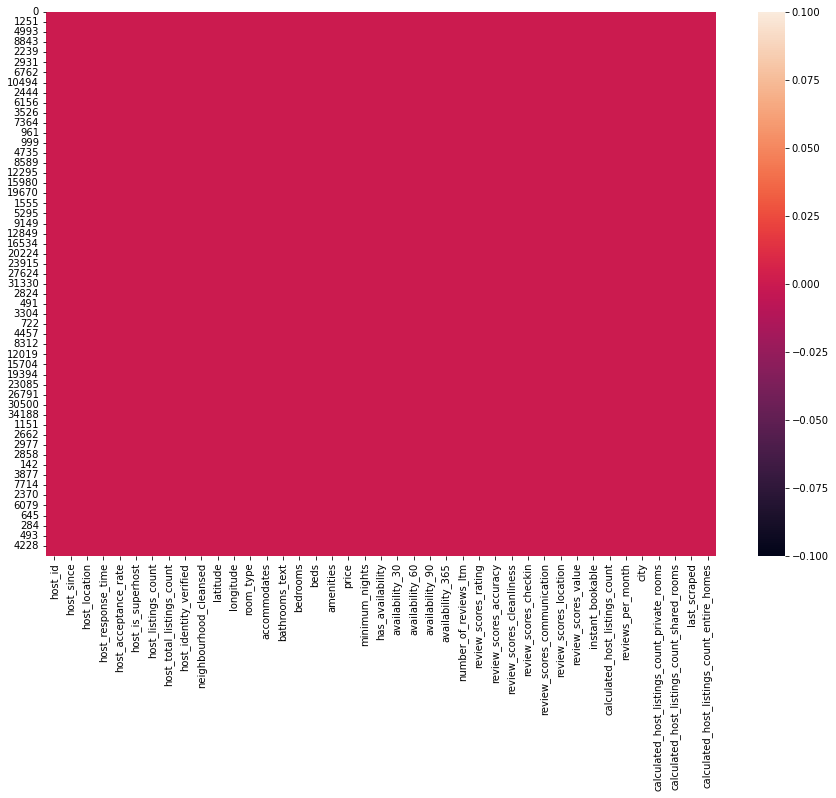

In [117]:
plt.figure(figsize = (15 , 10))
sns.heatmap(df_new.isnull())

## Conclusion
1. host_since is imputed with the minimum host_since dat
2. all the review columns are imputed with the corresponding mean of the scores of, also average for scores are different      for different cities so cities are taken into consideration to fill the nan values 
3. host_response_time is imputed considering host_id, if host_id has multiple listings and one of the listing has response    time but other listing doesnt have that then we impute it with the response time of the available listing else we impute    it with the mode of listing
4. All other numerical and categorical columns having null values are imputed with either mode or median or mean

<a id="feature"></a>

# Feature Engineering

### Feature Scalling of neighbourhood_cleansed

* **neighbourhood_cleansed**

* From the unique values of neighbourhood_cleansed we can see that there is presence of strings as well as numerical value which makes difficult to retrive certain specific strings from the records


* we want to convert new feature using test and digit present in the neighbourhood_cleansed

In [118]:
df_new['neighbourhood_cleansed'].unique()

array([28801, 28806, 28804, ...,
       'Twining, Fairlawn, Randle Highlands, Penn Branch, Fort Davis Park, Fort Dupont',
       'Near Southeast, Navy Yard',
       'Woodland/Fort Stanton, Garfield Heights, Knox Hill'], dtype=object)

In [119]:
# Dividing neighbourhood_cleansed' into 2 different columns - digit and text

df_new['neighbour_digit'] = pd.to_numeric(df_new['neighbourhood_cleansed'], errors='coerce')
mask = df_new['neighbour_digit'].isna()
df_new.loc[mask,'neighbour_text'] = df_new.loc[mask, 'neighbourhood_cleansed']

In [120]:
# neighbour_digit only contains numeric values from neighbourhood_cleansed columns rest are marked NaN
# This column is of no use to us.

df_new['neighbour_digit'].unique()

array([28801., 28806., 28804., 28805., 28803., 28715., 28704., 28732.,
       78702., 78729., 78704., 78759., 78741., 78731., 78758., 78705.,
       78727., 78703., 78722., 78733., 78725., 78701., 78751., 78723.,
       78752., 78757., 78736., 78732., 78746., 78745., 78754., 78730.,
       78724., 78756., 78749., 78721., 78734., 78737., 78748., 78738.,
       78744., 78726., 78753., 78735., 78750., 78728., 78739., 78717.,
       78742., 78747., 78712., 78719.,    nan])

In [121]:
# neighbour_text only contains string values from neighbourhood_cleansed columns rest are marked NaN
# We will be using this features for next steps. 

df_new['neighbour_text'].unique()

array([nan, 'East Boston', 'Roxbury', ...,
       'Twining, Fairlawn, Randle Highlands, Penn Branch, Fort Davis Park, Fort Dupont',
       'Near Southeast, Navy Yard',
       'Woodland/Fort Stanton, Garfield Heights, Knox Hill'], dtype=object)

In [122]:
# Filling NaN values with '###'(dummy values)
# This step is required since we will create a function next and it wont work if there are presence of null values.

df_new['neighbour_text'] = df_new['neighbour_text'].fillna('###')

In [123]:
# No nulls are present.
df_new['neighbour_text'].isnull().sum()

0

**Creating functions**

In [124]:
# Creating a function to count records which contains 'Park' 

def near_park(x):
    if 'Park' in x:
        return 1
    else:
        return 0

In [125]:
df_new['park_view'] = df_new['neighbour_text'].apply(near_park)

In [126]:
df_new['park_view'].value_counts()

0    189033
1      9916
Name: park_view, dtype: int64

In [127]:
# Creating a function to count records which contains water relatted words

def near_water(x):
    mylist = ['Beach','Lake','Lakes','Sea','Bay','Waterfront','Creek','Riverside','Shore','Meadows']
    for i in mylist:
        if i in x:
            return 1
    else:
        return 0

In [128]:
df_new['water_view'] = df_new['neighbour_text'].apply(near_water)

In [129]:
df_new['water_view'].value_counts()

0    184730
1     14219
Name: water_view, dtype: int64

In [130]:
# Creating a function to count records which contains mountains relatted words.

def near_hill(x):
    mylist = ['Hill','Hills','Valley','Canyons']
    for i in mylist:
        if i in x:
            return 1
    else:
        return 0

In [131]:
df_new['hill_view'] = df_new['neighbour_text'].apply(near_hill)

In [132]:
df_new['hill_view'].value_counts()

0    190292
1      8657
Name: hill_view, dtype: int64

In [133]:
# All these 3 new feature created are 'int' type. But they should be of object type.

df_new['park_view'].dtypes

dtype('int64')

In [134]:
# Changing data type of 3 new featues.

df_new['park_view'] = df_new['park_view'].astype('object')
df_new['water_view'] = df_new['water_view'].astype('object')
df_new['hill_view'] = df_new['hill_view'].astype('object')

In [135]:
# Dropping'neighbourhood_cleansed','neighbour_digit','neighbour_text' features.

df_new.drop(['neighbourhood_cleansed','neighbour_digit','neighbour_text'],axis=1,inplace=True)

In [136]:
df_new.shape

(198949, 43)

**Observation:**
1. Feature 'neighbourhood_cleansed' contained **1483** unique records which were mix of digit and strings.
2. 'neighbourhood_cleansed' feature was then divided into two new features 'neighbour_digit','neighbour_text' containing only digits and text respectively. 
3. 'neighbour_text' feature was then use to create 3 user defined functions to check for Airbnb locations which have neighbourhood containing parkview, waterview and hillview.

<a id="feature"></a>


# New features addition

In [137]:
# creating copy for backup
df2 = df_new.copy()

In [138]:
from datetime import datetime
from dateutil import relativedelta
import datetime

#### Based on 'host_since' creating new column  'host_experience'

* host_experience --  it will use to classifiy the host listing as new and old.

In [139]:
diff = pd.to_datetime(df['last_scraped']) - pd.to_datetime(df_new['host_since'])

In [140]:
#diff = (end.year - start.year) * 12 + (end.month  - start.month )

# Aadding a colum in main data frame. 
df_new['diff_in_month'] = (((pd.to_datetime(df_new['last_scraped']).dt.year) - (pd.to_datetime(df_new['host_since']).dt.year))* 12) + (pd.to_datetime(df_new['last_scraped']).dt.month - pd.to_datetime(df_new['host_since']).dt.month)

In [141]:
# adding another coloum as 'host_age' based on diff_in_month as below condition
# two categories has been made --> old and new 
#if diff_in_month > 6 month  -->  value os 'old' 
# else value is 'new' 

df_new['host_experience'] = ['new' if  i < 7 else 'old' for i in df_new['diff_in_month']]

#host_age = ['new' if  i > 7 else 'old' for i in inmonth['diff']]

In [142]:
df_new['host_experience'].unique()

array(['old', 'new'], dtype=object)

In [143]:
# droping diff_in_month
df_new = df_new.drop(['diff_in_month'] , axis = 1)
df_new.shape

(198949, 44)

#### droping few similar type of variable based on multicollinearity

In [144]:
df_new[[ 'availability_30' ,'availability_60' , 'availability_90' , 'availability_365' , 'price']].corr()

,availability_30,availability_60,availability_90,availability_365,price
availability_30,1.000000,0.914705,0.831790,0.461641,0.063472
availability_60,0.914705,1.000000,0.963345,0.560274,0.057604
availability_90,0.831790,0.963345,1.000000,0.621101,0.049261
availability_365,0.461641,0.560274,0.621101,1.000000,0.054900
price,0.063472,0.057604,0.049261,0.054900,1.000000


In [145]:
# these variables are very much co-related to each other so we can select any one variable. 

# so we can select the 'availability_365' only  in our dataset.

In [146]:
# droping other 'availability'  columns
df_new.drop(['availability_30' ,'availability_60' , 'availability_90'] ,axis = 1 , inplace = True)

In [147]:
df_new.shape

(198949, 41)

In [148]:
df[['calculated_host_listings_count' ,'calculated_host_listings_count_entire_homes' , 'calculated_host_listings_count_private_rooms' , 'calculated_host_listings_count_shared_rooms' , 'price']].corr()

,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
calculated_host_listings_count,1.000000,0.931182,0.315797,0.030074
calculated_host_listings_count_entire_homes,0.931182,1.000000,0.000205,-0.027171
calculated_host_listings_count_private_rooms,0.315797,0.000205,1.000000,0.025583
calculated_host_listings_count_shared_rooms,0.030074,-0.027171,0.025583,1.000000


#### 'calculated_host_listings_count_entire_homes' has collinearity  with 'calculated_host_listings_count' so we will remove the first one. 

In [149]:
df_new.drop(['calculated_host_listings_count_entire_homes'] ,axis = 1 , inplace = True)

In [162]:
df_new.loc[:,['host_listings_count','host_total_listings_count']].corr()

,host_listings_count,host_total_listings_count
host_listings_count,1.0,1.0
host_total_listings_count,1.0,1.0


**Observation:**
* There co-relation is 1. Hence we have a feature duplicacy.
* Must drop 1 feature.

In [163]:
df_new.drop('host_listings_count',axis=1,inplace=True)

In [164]:
df_new.shape

(198949, 39)

In [165]:
# host_total_listings_count is float data type wherein it should be int
# Changing the data type

df_new['host_total_listings_count'] = df_new['host_total_listings_count'].astype('int64')

In [166]:
# There were some values of host_total_listings_count which were 0 which practically is impossible.

# Creating a dictionary which holds the value counts for all the host_id
map_list = dict(df_new['host_id'].value_counts())

# Mapping the ditionary onto the host_total_listings_count, this will impute those 0 values.
df_new['host_total_listings_count'] = df_new['host_id'].map(map_list)

In [168]:
df_new['host_total_listings_count']

0         2
1         7
2         7
3         7
4         1
       ... 
8028      1
8029    243
8030     28
8031    343
8032    343
Name: host_total_listings_count, Length: 198949, dtype: int64

<a id="city_data"></a>

## Adding city data 


* we have added few new feature based on city so that we can make our date more releted to city and its geography.

* we have prepared this data using various source like - wikipedia and other gov. site

In [169]:
df_city = pd.read_excel('City_Data_updated.xlsx') 
print(df_city.shape)
df_city

(28, 7)


,city,state,population,Geography,landscape,Weather,city_tier
0,New_York,New York,18713220,"farms, forests, rivers, mountains, and lakes.",Plain,High temperatures and evenly distributed prec...,Tier1
1,Los_Angeles,California,12750807,a coastal plain separated by low mountains,Coastal Plain,Hot Summer and cold Winter,Tier1
2,Hawaii,Hawaii,1826327,a group of volcanic islands,islands,Hot Summer and cold Winter,Tier1
3,Broward_County,Florida,1944375,Green plain land with Sea coast,Coastal Plain,Hot Summer and cold Winter,Tier1
4,Austin,Texas,1687311,"Colorado River,hill Country ,limestone cliff",Hilly,Hot Summer and Mild Winter,Tier1
5,San_Diego,California,3220118,Beaches and a dazzling array of world-class fa...,Coastal Plain,Short Summer and Long Winter,Tier1
6,Clark_County,Nevada,2266715,floodplains,Plain,High temperatures and evenly distributed prec...,Tier1
7,Washington_DC,District of Columbia,5379184,"Hills , Mountains and Lots of River",Hilly,Mild Summer and Cold Winter,Tier1
8,San_Fransisco,California,3592294,"less densely populated hills , Coastal",Hilly,Hot Summer and Cold Winter,Tier1
9,Chicago,Illinois,8604203,fresh water coastal,Plain,Warm Summer and Cold Winter,Tier1


In [170]:
df_city.columns

Index(['city', 'state', 'population', 'Geography', 'landscape', 'Weather',
       'city_tier'],
      dtype='object')

In [171]:
# creating new dataframe with important city data columns
df_city = df_city.drop(['state', 'population', 'Geography','Weather'] , axis = 1)
df_city.shape

(28, 3)

In [172]:
df_fin = pd.merge(df_new, df_city, on='city')

In [173]:
df_fin.shape

(198949, 41)

In [174]:
df_fin.head(5)

,host_id,host_since,host_location,host_response_time,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,...,city,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,last_scraped,park_view,water_view,hill_view,host_experience,landscape,city_tier
0,320564,2010-12-16,"Asheville, North Carolina, United States",within a day,25,f,2,t,35.60670,-82.55563,...,Ashville,0,0,2021-07-10,0,0,0,old,Plain and Hilly area,Tier3
1,746673,2011-06-26,"Asheville, North Carolina, United States",within an hour,99,t,7,t,35.57864,-82.59578,...,Ashville,2,4,2021-07-10,0,0,0,old,Plain and Hilly area,Tier3
2,746673,2011-06-26,"Asheville, North Carolina, United States",within an hour,99,t,7,t,35.57864,-82.59578,...,Ashville,2,4,2021-07-10,0,0,0,old,Plain and Hilly area,Tier3
3,746673,2011-06-26,"Asheville, North Carolina, United States",within an hour,99,t,7,t,35.57864,-82.59578,...,Ashville,2,4,2021-07-10,0,0,0,old,Plain and Hilly area,Tier3
4,769252,2011-07-02,"Asheville, North Carolina, United States",within an hour,100,f,1,f,35.61442,-82.54127,...,Ashville,1,0,2021-07-10,0,0,0,old,Plain and Hilly area,Tier3


In [175]:
# Creating copy of a df_fin dataset
master_data = df_fin.copy(deep=True)

In [176]:
# Shape of the dataset
master_data.shape

(198949, 41)

In [177]:
master_data.dtypes

host_id                                           int64
host_since                                       object
host_location                                    object
host_response_time                               object
host_acceptance_rate                              int32
host_is_superhost                                object
host_total_listings_count                         int64
host_identity_verified                           object
latitude                                        float64
longitude                                       float64
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        float64
beds                                            float64
amenities                                        object
price                                           float64
minimum_nights                                  

In [178]:
# Shape of dataset before transformation
master_data.shape

(198949, 41)

## Word cloud for 'amenities'

In [179]:
# word cloud for 'amenities'
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

In [180]:
text = master_data['amenities'][0]

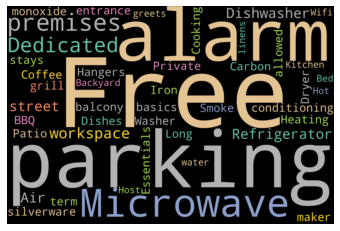

In [181]:
text = master_data['amenities'][0]

# Create and generate a single word cloud image:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [182]:
# Creating a single text for whole 'amenities' columns

fin_list = []
for i in master_data['amenities']:
    fin_list.append(i)
    text = text+''.join(i)

In [183]:
len(fin_list)

198949

In [184]:
len(text)

92297679

In [185]:
# replacing special char in the text. 
text = text.replace('[' , '')
text = text.replace(']' , '')
len(text)

91899778

In [186]:
# adding word to remove them from display 
STOPWORDS.add('alarm')
STOPWORDS.add('allowed')
STOPWORDS.add('monxide')

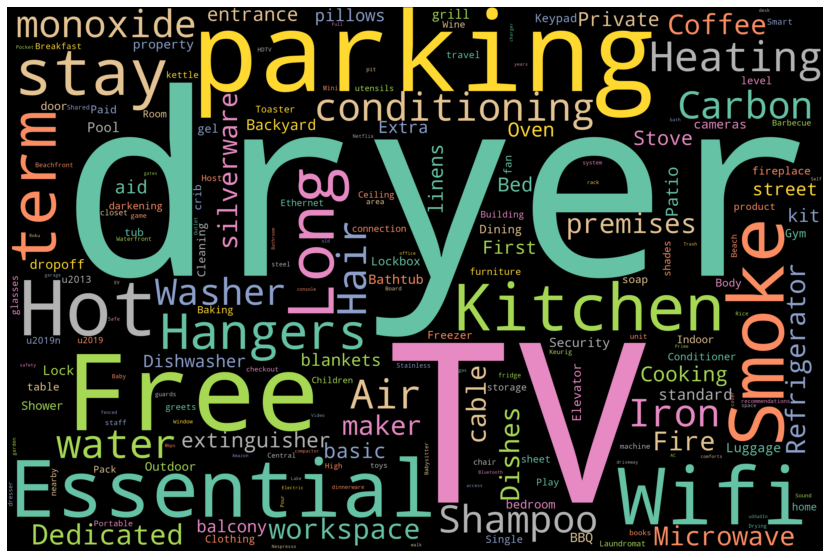

In [197]:
# Create and generate a word cloud image:

plt.figure(figsize = (20,10))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', 
                      colormap='Set2', collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [198]:
wordcloud.words_

{'dryer': 1.0,
 'TV': 0.7612348770980186,
 'parking': 0.7266062087212942,
 'Free': 0.6768495889802266,
 'Essential': 0.6706893417624367,
 'Wifi': 0.6702214322743094,
 'Hot': 0.6333912329246699,
 'Smoke': 0.62069371789434,
 'Kitchen': 0.5977223916570729,
 'stay': 0.5846478560319929,
 'Long': 0.5846175597342005,
 'term': 0.5846108272235799,
 'Hangers': 0.5614711882207994,
 'Heating': 0.5562164636814715,
 'water': 0.5373115738590077,
 'Hair': 0.5326156477011843,
 'Air': 0.5298889808998674,
 'conditioning': 0.529734133155595,
 'Iron': 0.5154309143422674,
 'Shampoo': 0.5089037452956582,
 'Carbon': 0.5037567409262588,
 'monoxide': 0.5037567409262588,
 'Washer': 0.47397548019632,
 'workspace': 0.47166286279816605,
 'Dedicated': 0.47143059118175756,
 'Coffee': 0.4521890758282671,
 'premises': 0.44522765984663343,
 'maker': 0.4336342765580713,
 'Refrigerator': 0.4268445395972612,
 'Dishes': 0.42239771633239753,
 'silverware': 0.42239435007708726,
 'Fire': 0.41917957625578156,
 'Microwave': 0.41

#### creating a new column 'amenities_count' using amenities

In [187]:
# converting amenities into count of amenities
amenities_count = []
for i in range(len(master_data)):
    amenities_count.append(len(master_data.amenities.values[i].split(sep = ',')))
    
master_data['amenities_count'] = amenities_count
master_data['amenities_count'].unique()

array([ 28,  26,  20,  16,  11,  35,  42,  19,  41,  24,  46,  17,  52,
        30,  34,  31,  45,  14,  56,  43,  18,  33,  32,  38,  27,  25,
        48,  39,  21,  44,  12,  55,  22,  53,  40,  29,  23,   9,  58,
        37,  36,  15,  49,  57,  60,  50,  47,  13,  59,  51,  54,  61,
        78,  83,  67,  10,  71,   8,  74,   5,  72,  65,  66,   7,  62,
        63,  73,   4,  64,  80,  82,   1,   6,   3,  77,  69,  75,   2,
        68,  76,  98,  70,  91, 100,  88,  84,  85,  86,  90,  79,  93,
        92,  94,  81,  87, 119,  95,  89], dtype=int64)

In [188]:
import re
from functools import reduce

### converting bathroom_text to count of bathroom 


In [190]:
# converting bathroom_text to count of bathroom 
bath_cnt = []
for i in master_data['bathrooms_text']:
    temp = re.findall(r'\d+', i)
    if temp == []:
        temp = '1'
    bath_cnt.append(float(reduce(lambda x,y:x+'.'+y ,temp)))
  

In [191]:
master_data['bathrooms'] = bath_cnt

In [192]:
# final shape of master data 
master_data.shape

(198949, 43)

In [193]:
# to download master_Data
master_data.to_csv('master_Data.csv' , index = False)
# this data can be used for tableau dashbord

<a id="power"></a>

##  POWER TRANSFORMATION

In [195]:
# checking skewness of our data.

master_data.skew()

host_id                                          1.034384
host_acceptance_rate                            -2.394168
host_total_listings_count                        8.327874
latitude                                        -0.709883
longitude                                       -0.510297
accommodates                                     1.700286
bedrooms                                         2.590451
beds                                             5.788095
price                                           20.505842
minimum_nights                                  13.669392
availability_365                                 0.179406
number_of_reviews_ltm                            6.083580
review_scores_rating                            -5.939088
review_scores_accuracy                          -6.037785
review_scores_cleanliness                       -4.694419
review_scores_checkin                           -7.414595
review_scores_communication                     -6.978351
review_scores_

##### our data is highly skewd so we need to make it normally distributed if want to apply Linear regression.

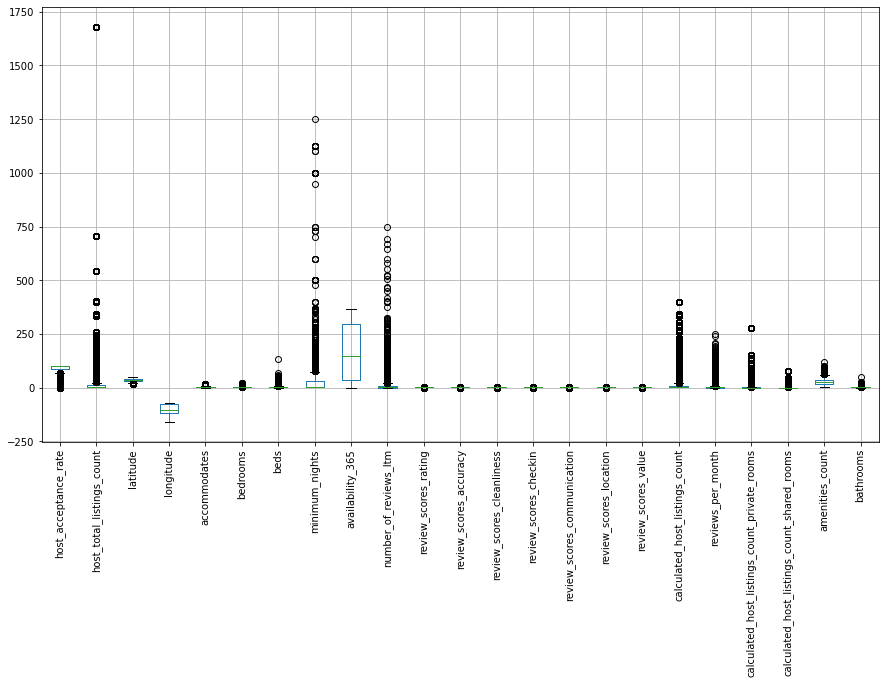

In [196]:
plt.figure(figsize=(15,8))
master_data.drop(['host_id','price'],axis=1).boxplot()
plt.xticks(rotation=90)
plt.show()

### observation 
* we can see that their is high outliers present in our dataset. 

#### so to visualies boxplot in better way we need to create a box plot for each variable.

In [198]:
# Dividing the dataset into numerical and categorical dataframes
num_data = master_data.select_dtypes(include=np.number)
cat_data = master_data.select_dtypes(exclude=np.number)

In [199]:
# Shape of each dataframe

num_data.shape, cat_data.shape

((198949, 25), (198949, 18))

In [200]:
num_data.columns

Index(['host_id', 'host_acceptance_rate', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'availability_365', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'amenities_count',
       'bathrooms'],
      dtype='object')

In [201]:
cat_data.columns

Index(['host_since', 'host_location', 'host_response_time',
       'host_is_superhost', 'host_identity_verified', 'room_type',
       'bathrooms_text', 'amenities', 'has_availability', 'instant_bookable',
       'city', 'last_scraped', 'park_view', 'water_view', 'hill_view',
       'host_experience', 'landscape', 'city_tier'],
      dtype='object')

In [202]:
# We dont need to normalize these 4 features
# Storing them into a new dataframe
ntnorm_num = num_data.loc[:,['host_id','latitude','longitude','price']]

In [203]:
# Creating new dataframe for features to be transformed.

norm_num = num_data.drop(['host_id','latitude','longitude','price'],axis=1)

In [204]:
# Checking for shape of dataframe
ntnorm_num.shape, norm_num.shape

((198949, 4), (198949, 21))

In [205]:
# Dataframe before normalization
norm_num.head()

,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,amenities_count,bathrooms
0,25,2,2,1.0,1.0,30,217,0,4.49,4.57,...,4.85,4.79,4.84,4.48,2,0.75,0,0,28,1.0
1,99,7,2,1.0,1.0,1,130,70,4.57,4.68,...,4.81,4.76,4.92,4.51,7,5.39,2,4,26,1.0
2,99,7,2,1.0,1.0,1,4,0,4.52,4.73,...,4.76,4.61,4.84,4.46,7,3.09,2,4,20,2.5
3,99,7,1,1.0,6.0,1,174,8,4.70,4.81,...,4.84,4.80,4.78,4.79,7,3.47,2,4,16,2.5
4,100,1,2,1.0,1.0,30,0,0,4.96,4.77,...,4.94,4.88,4.90,4.85,1,0.49,1,0,11,1.0


In [206]:
# Power transformation
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer()
norm_num_done = pd.DataFrame(pt.fit_transform(norm_num),columns=norm_num.columns)

In [207]:
# Dataframe after normalization
norm_num_done.head()

,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,amenities_count,bathrooms
0,-2.474009,-0.331010,-0.786342,-0.762125,-0.746927,1.259170,0.582631,-1.016215,-1.128233,-1.429031,...,-0.568556,-0.888764,-0.194709,-1.136618,-0.302021,-0.501575,-0.683423,-0.153160,0.043770,-0.592974
1,0.576441,0.687034,-0.786342,-0.762125,-0.746927,-1.228224,0.093928,1.704739,-0.871464,-1.016909,...,-0.862247,-1.064090,0.424732,-1.043754,0.742857,1.380504,1.472644,6.529102,-0.123317,-0.592974
2,0.576441,0.687034,-0.786342,-0.762125,-0.746927,-1.228224,-1.406444,-1.016215,-1.035664,-0.784785,...,-1.171648,-1.706608,-0.194709,-1.195689,0.742857,0.848699,1.472644,6.529102,-0.661302,1.486469
3,0.576441,0.687034,-1.836543,-0.762125,1.825201,-1.228224,0.358552,0.908367,-0.380653,-0.342213,...,-0.646210,-0.826058,-0.574772,0.120913,0.742857,0.963057,1.472644,6.529102,-1.059378,1.486469
4,0.663669,-0.966934,-0.786342,-0.762125,-0.746927,1.259170,-1.648721,-1.016215,0.939167,-0.575285,...,0.279185,-0.236463,0.256459,0.456230,-0.969832,-0.819124,1.061857,-0.153160,-1.622254,-0.592974


In [208]:
## rechecking skewness of data
norm_num_done.skew()

host_acceptance_rate                           -1.469893
host_total_listings_count                       0.508071
accommodates                                    0.035254
bedrooms                                        0.607503
beds                                           -0.027536
minimum_nights                                  0.263138
availability_365                               -0.479238
number_of_reviews_ltm                           0.277003
review_scores_rating                           -0.692889
review_scores_accuracy                         -0.537518
review_scores_cleanliness                      -0.421889
review_scores_checkin                          -0.713643
review_scores_communication                    -0.713659
review_scores_location                         -0.451565
review_scores_value                            -0.293579
calculated_host_listings_count                  0.484205
reviews_per_month                               0.053560
calculated_host_listings_count_

#### most of data is now close to Zero which means that data is now normally distributed.

In [209]:
# Verifing shape of data after transformation
norm_num_done.shape

(198949, 21)

In [211]:
# Concatinating all categorical and numerical(transformed + 4 non-transformed features) features into a new dataframe

ntnorm_num.reset_index(drop = True, inplace= True)
norm_num_done.reset_index(drop = True, inplace= True)
cat_data.reset_index(drop = True, inplace= True)

data_final = pd.concat([ntnorm_num,norm_num_done,cat_data],axis=1)

# Shape of data frame
data_final.shape

(198949, 43)

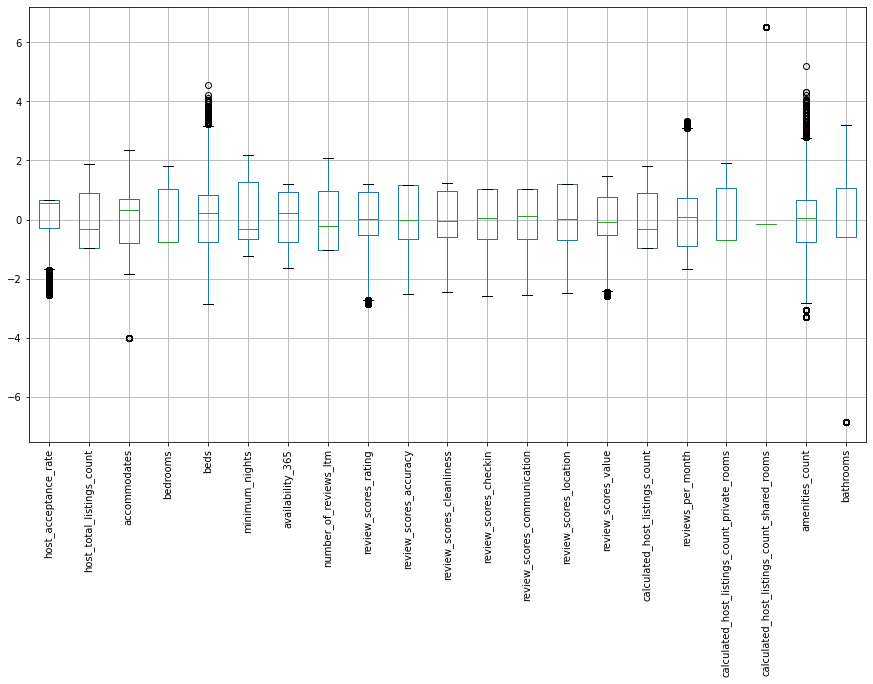

In [213]:
# Boxplot after the transformation 

plt.figure(figsize=(15,8))
data_final.drop(['host_id','latitude','longitude','price'],axis=1).boxplot()
plt.xticks(rotation=90)
plt.show()

**Observation:**
* We can see that outliers have significantly reduced after transformation.
* Now we can see a comparitively clean boxplot.

In [214]:
# Shape of the data
data_final.shape

(198949, 43)

<a id="outlier"></a>

### OUTLIER REMOVAL

In [215]:
# Shape of data before outlier removal
data_final.shape

(198949, 43)

In [216]:
# IQR Treatment

Q1 = data_final.quantile(0.25)
Q3 = data_final.quantile(0.75)
IQR = Q3 -Q1

LL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR

In [217]:
# Number of outlier present in the data

len(data_final[((data_final < LL) | (data_final > UL)).any(axis=1)])

51941

In [218]:
# Creating a new dataframe free from outliers

data_wtoutliers = data_final[~((data_final < LL) | (data_final > UL)).any(axis=1)]  

In [219]:
# Shape of data without outliers

data_wtoutliers.shape

(147008, 43)

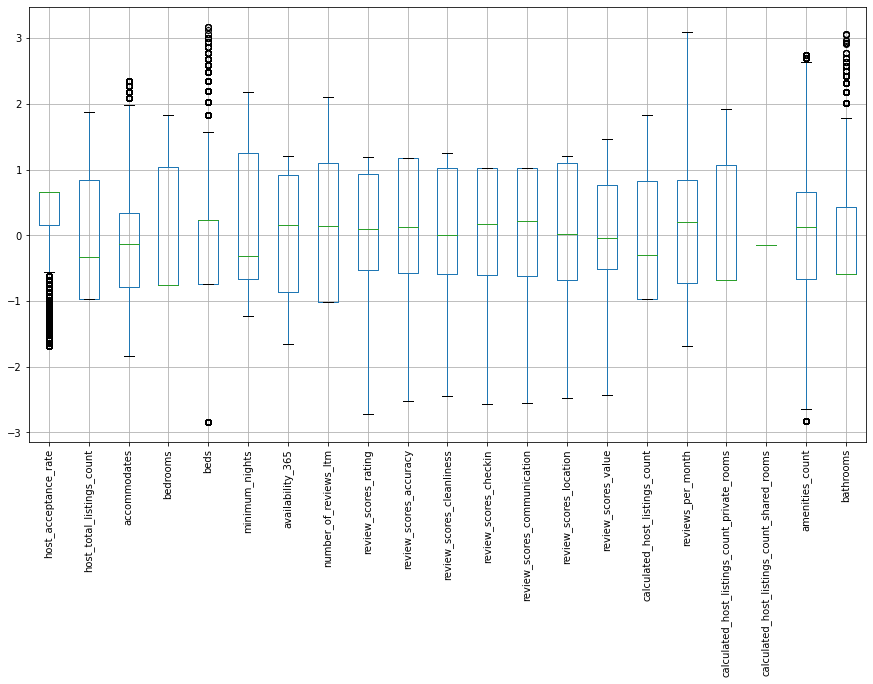

In [220]:
# Boxplot after IQR treatment.

plt.figure(figsize=(15,8))
data_wtoutliers.drop(['host_id','latitude','longitude','price'],axis=1).boxplot()
plt.xticks(rotation=90)
plt.show()

In [222]:
len(data_wtoutliers.columns)

43

In [249]:
# Creating a CSV file of without outliers data.
data_wtoutliers.to_csv('airbnb_final.csv' ,index = False )

In [223]:
df_final = pd.read_csv('airbnb_final.csv' )
df_final.head(2)

,host_id,latitude,longitude,price,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,...,has_availability,instant_bookable,city,last_scraped,park_view,water_view,hill_view,host_experience,landscape,city_tier
0,769252,35.61442,-82.54127,125.0,0.663669,-0.966934,-0.786342,-0.762125,-0.746927,1.259170,...,f,f,Ashville,2021-07-10,0,0,0,old,Plain and Hilly area,Tier3
1,1292070,35.59635,-82.50655,68.0,-0.804247,0.033293,-0.786342,-0.762125,-0.746927,-0.314422,...,t,f,Ashville,2021-07-10,0,0,0,old,Plain and Hilly area,Tier3


### Droping few columns which are not useful in machine learning model building 

In [224]:
# drop the bathrooms_test
df_final.drop('bathrooms_text' , axis = 1 ,inplace = True)

In [225]:
# amenities 
df_final.drop('amenities' , axis = 1 ,inplace = True)

In [228]:
# droping some non useful columns before model buildings

df_final =df_final.drop(['host_id' , 'latitude' , 'longitude' , 'host_since' , 'host_location' , 'last_scraped'
                    , 'landscape', 'city'] , axis = 1)

In [229]:
len(df_final.columns)

33

In [230]:
df_final.columns

Index(['price', 'host_acceptance_rate', 'host_total_listings_count',
       'accommodates', 'bedrooms', 'beds', 'minimum_nights',
       'availability_365', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'amenities_count',
       'bathrooms', 'host_response_time', 'host_is_superhost',
       'host_identity_verified', 'room_type', 'has_availability',
       'instant_bookable', 'park_view', 'water_view', 'hill_view',
       'host_experience', 'city_tier'],
      dtype='object')

<a id="encod"></a>

## Encoding

### few variable has only true/false value so converting them numerical column

In [232]:
# changing the data type of few variable 
df_final['instant_bookable'] = df_final['instant_bookable'].replace({'t':1 , 'f':0}).astype(int64)
df_final['host_is_superhost'] = df_final['host_is_superhost'].replace({'t':1 , 'f':0}).astype(int64)
df_final['host_identity_verified'] = df_final['host_identity_verified'].replace({'t':1 , 'f':0}).astype(int64)
df_final['has_availability'] = df_final['has_availability'].replace({'t':1 , 'f':0}).astype(int64)
df_final['host_experience'] = df_final['host_experience'].replace({'old':0 , 'new':1}).astype(int64)

In [233]:
df_final['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room'], dtype=object)

In [234]:
df_final.columns

Index(['price', 'host_acceptance_rate', 'host_total_listings_count',
       'accommodates', 'bedrooms', 'beds', 'minimum_nights',
       'availability_365', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'amenities_count',
       'bathrooms', 'host_response_time', 'host_is_superhost',
       'host_identity_verified', 'room_type', 'has_availability',
       'instant_bookable', 'park_view', 'water_view', 'hill_view',
       'host_experience', 'city_tier'],
      dtype='object')

In [235]:
print("shape of data before encoding - " , df_final.shape)
df_dum = pd.get_dummies(df_final , drop_first = True)

shape of data before encoding -  (147008, 33)


In [236]:
print("shape of data after encoding - " , df_dum.shape)
df_dum.head()

shape of data after encoding -  (147008, 38)


,price,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,availability_365,number_of_reviews_ltm,review_scores_rating,...,hill_view,host_experience,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Hotel room,room_type_Private room,city_tier_Tier2,city_tier_Tier3,city_tier_Tier4
0,125.0,0.663669,-0.966934,-0.786342,-0.762125,-0.746927,1.259170,-1.648721,-1.016215,0.939167,...,0,0,0,0,1,0,1,0,1,0
1,68.0,-0.804247,0.033293,-0.786342,-0.762125,-0.746927,-0.314422,-0.386337,-1.016215,-0.542135,...,0,0,0,0,1,0,1,0,1,0
2,76.0,0.663669,-0.966934,-0.786342,-0.762125,-0.746927,-1.228224,0.182963,1.585335,0.760028,...,0,0,0,0,1,0,0,0,1,0
3,125.0,0.663669,-0.966934,-0.786342,-0.762125,-0.746927,-0.662242,0.989205,0.908367,1.062971,...,0,0,0,1,0,0,0,0,1,0
4,124.0,0.406554,0.274758,-0.786342,-0.762125,-0.746927,-0.662242,1.192553,0.540372,-0.380653,...,0,0,0,0,1,0,1,0,1,0


In [281]:
df_dum.to_csv('airbnb_encoded.csv' , index=False )

<a id="base_mod"></a>


## Base model building 

In [3]:
df_dum = pd.read_csv('airbnb_encoded.csv')
df_dum.shape

(147008, 38)

In [4]:
# spliting data 
x = df_dum.drop('price', axis = 1)
y = df_dum['price']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [6]:
# basic model 
x = sm.add_constant(X_train)
base_mod = sm.OLS(y_train,X_train).fit()
base_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     2748.
Date:                Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:58:13   Log-Likelihood:            -6.7374e+05
No. Observations:              117606   AIC:                         1.348e+06
Df Residuals:                  117569   BIC:                         1.348e+06
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
host_acceptance_rate                            -1.5607      0.929     -1.681      0.093      -3.381       0.259
host_total_listings_count                       30.6636      1.636     18.739      0.000      27.456      33.871
accommodates                                    26.0971      0.442     59.043      0.000      25.231      26.963
bedrooms                                        14.9683      0.398     37.574      0.000      14.187      15.749
beds                                             5.9331      0.375     15.828      0.000       5.198       6.668
minimum_nights                                 -11.1177      0.265    -41.971      0.000     -11.637     -10.598
availability_365                                 5.0296      0.252     19.966      0.000       4.536       5.523
number_of_reviews_ltm                          -13.7003      0.303    -45.282      0.000     -14.293     -13.107
review_scores_rating                            11.6502      0.472     24.664      0.000      10.724      12.576
review_scores_accuracy                          -0.0674      0.383     -0.176      0.861      -0.819       0.684
review_scores_cleanliness                        3.7900      0.334     11.355      0.000       3.136       4.444
review_scores_checkin                           -4.1562      0.327    -12.695      0.000      -4.798      -3.515
review_scores_communication                     -2.5241      0.355     -7.118      0.000      -3.219      -1.829
review_scores_location                          13.2404      0.267     49.558      0.000      12.717      13.764
review_scores_value                            -16.0637      0.353    -45.487      0.000     -16.756     -15.372
calculated_host_listings_count                 -23.3040      1.637    -14.233      0.000     -26.513     -20.095
reviews_per_month                               -1.0336      0.273     -3.785      0.000      -1.569      -0.498
calculated_host_listings_count_private_rooms    -6.6272      0.466    -14.228      0.000      -7.540      -5.714
calculated_host_listings_count_shared_rooms  -1297.4000     16.149    -80.339      0.000   -1329.052   -1265.748
amenities_count                                  1.1526      0.269      4.285      0.000       0.625       1.680
bathrooms                                       21.8818      0.365     59.958      0.000      21.167      22.597
host_is_superhost                                3.6362      0.542      6.715      0.000       2.575       4.698
host_identity_verified                           4.2159      0.567      7.432      0.000       3.104       5.328
has_availability                               -17.9472      1.594    -11.260      0.000     -21.071     -14.823
instant_bookable                

## inference 
1. model has lower R-squared which means model will not able to perform well on train data.
2. review_scores_accuracy , host_response_time_within a day these variable are not significatent in price prediction. 
3. Large J-B value indicates that errors are not normally distributed.

### assumptions test

#### 1. Linearity 

In [7]:
import statsmodels.api as smodels

In [8]:
fstat  , pvalue  = smodels.stats.diagnostic.linear_rainbow(base_mod)

print(f"f-stats is {fstat} and pvalue is {pvalue}")

# this test gives that p> .05  --> means we fail to reject the H0 
# which means model is linear

f-stats is 0.986173718455487 and pvalue is 0.9542761301717493



#### 2.normailty 

In [9]:
# using shapiro wilk we will test the normality of data
from scipy import stats 


stats.shapiro(y)

# this test gives that p< .05  --> means we reject the H0 
# which means data is not normal

ShapiroResult(statistic=0.8991368412971497, pvalue=0.0)

In [10]:
stats.shapiro(base_mod.resid)

ShapiroResult(statistic=0.9456066489219666, pvalue=0.0)

In [11]:
# we can also use jarque_bera_test for testing normaility of data. 

jarque_bera_test = stats.jarque_bera(y)
jarque_bera_test


# this test gives that p< .05  --> means we reject the H0 
# which means data is not normal

Jarque_beraResult(statistic=34666.271531681785, pvalue=0.0)

#### 3.Mulicollinerity

<AxesSubplot:>

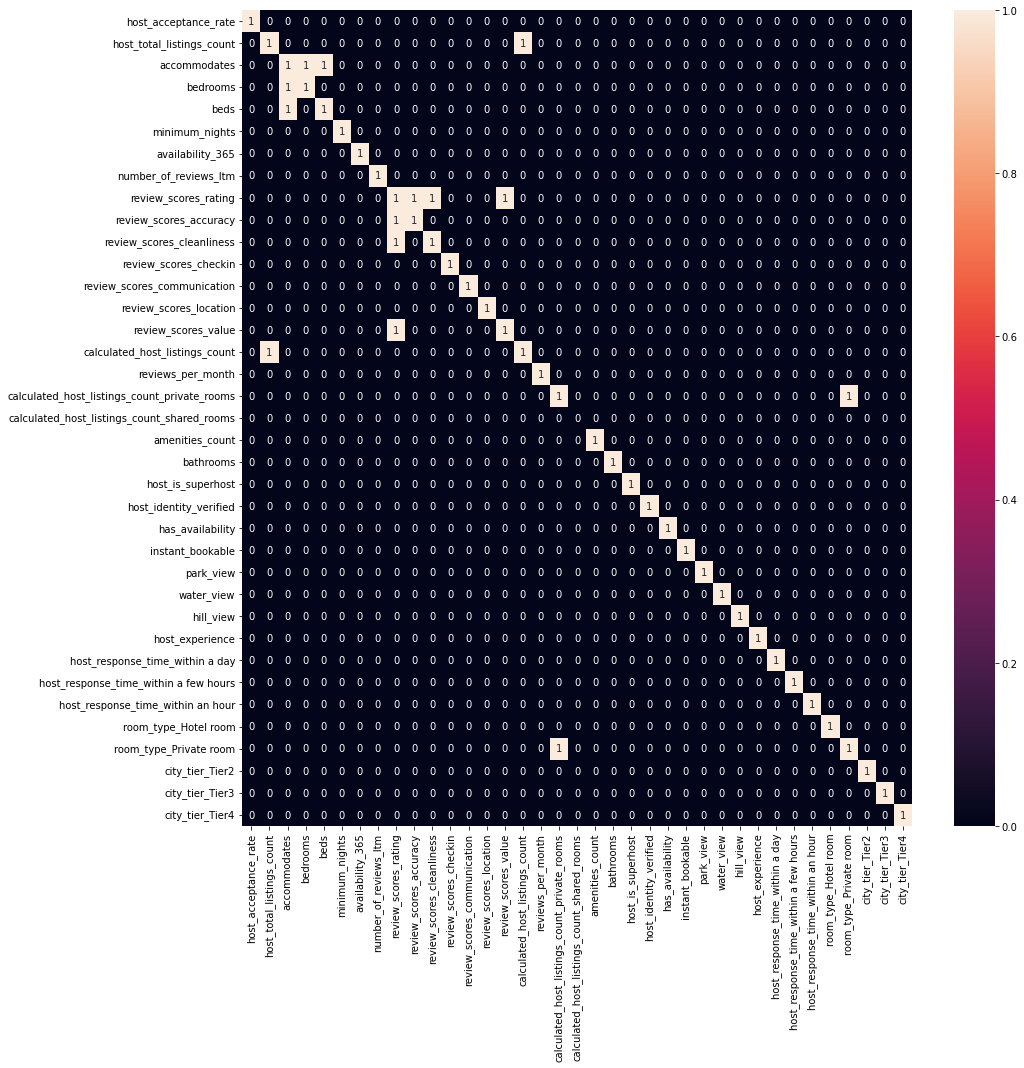

In [12]:
plt.figure(figsize = (15,15))
sns.heatmap (x.corr() > .7 , annot = True)

#### there is still some strong mulicoolinerity is present.so need to some VIF , PCA to reduce the multicolinerilty 

<a id="pca"></a>

## PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
model = PCA(n_components=25).fit(X_train)
X_pc = model.transform(X_train)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X_train.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df_imp_feat = pd.DataFrame(dic.items() , columns = ['PC_order' , 'Column_name'])

In [15]:
X_train.columns

Index(['host_acceptance_rate', 'host_total_listings_count', 'accommodates',
       'bedrooms', 'beds', 'minimum_nights', 'availability_365',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'amenities_count',
       'bathrooms', 'host_is_superhost', 'host_identity_verified',
       'has_availability', 'instant_bookable', 'park_view', 'water_view',
       'hill_view', 'host_experience', 'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'room_type_Hotel room',
       'room_type_Private room', 'city_tier_Tier2', 'city_tier_Tier3',
       'city_tier_Tier4'],
   

In [16]:
set(most_important_names)

{'accommodates',
 'amenities_count',
 'availability_365',
 'bathrooms',
 'bedrooms',
 'calculated_host_listings_count',
 'calculated_host_listings_count_private_rooms',
 'host_identity_verified',
 'host_is_superhost',
 'host_response_time_within a day',
 'instant_bookable',
 'number_of_reviews_ltm',
 'park_view',
 'review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'reviews_per_month',
 'water_view'}

In [17]:
sum(model.explained_variance_ratio_)
# total of 98.48 % of variance is explained by 25 feature so just selecting those only feature for model building.

0.9847418915268487

In [18]:
imp_feat = list(set(df_imp_feat.Column_name))
imp_feat

['amenities_count',
 'accommodates',
 'instant_bookable',
 'review_scores_communication',
 'review_scores_accuracy',
 'calculated_host_listings_count',
 'availability_365',
 'review_scores_rating',
 'host_is_superhost',
 'review_scores_location',
 'calculated_host_listings_count_private_rooms',
 'reviews_per_month',
 'number_of_reviews_ltm',
 'water_view',
 'review_scores_checkin',
 'host_identity_verified',
 'host_response_time_within a day',
 'park_view',
 'review_scores_value',
 'bathrooms',
 'bedrooms']

<AxesSubplot:>

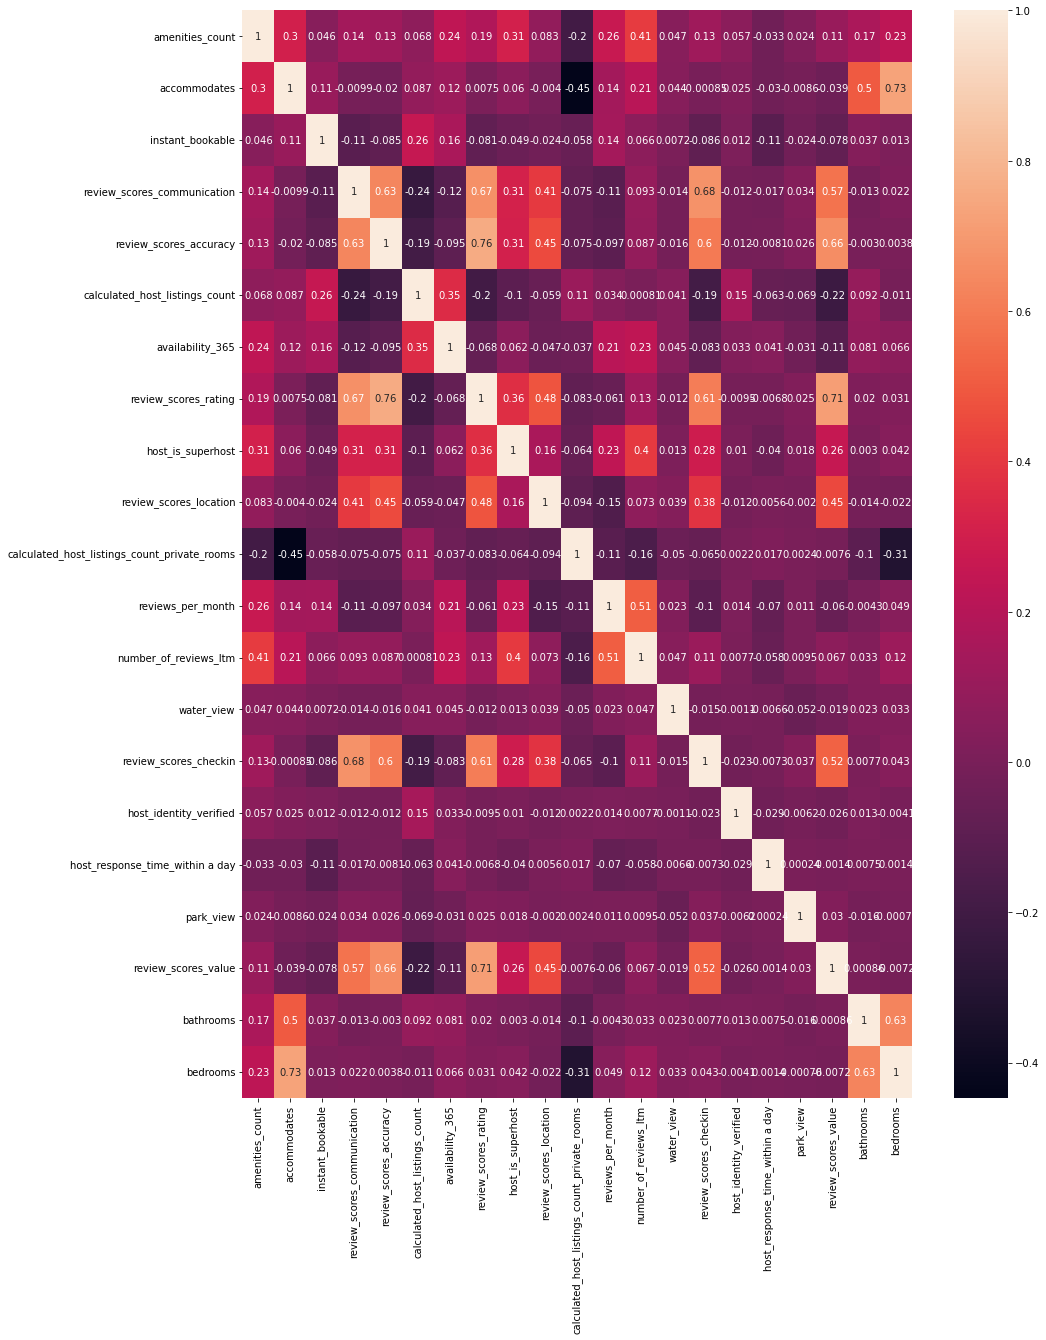

In [19]:
plt.figure(figsize = (15,20))
sns.heatmap(df_dum[imp_feat].corr() , annot = True)

#### Using PCA still we can see there is multicolinerily exist.

<a id="vif"></a>
## Vif

#### there is still some variable showing coolinerilty.so we need to use VIF to remove that. 

In [20]:
vif = pd.DataFrame()
vif['features'] = df_dum[imp_feat].columns
vif['VIF values'] = [variance_inflation_factor(df_dum[imp_feat].values,i) for i in range(df_dum[imp_feat].shape[1])]
vif.sort_values(by= 'VIF values' ,  ascending = False)

#A value greater than 5 indicates potentially severe correlation between a given explanatory variable

,features,VIF values
7,review_scores_rating,3.424168
20,bedrooms,2.795849
4,review_scores_accuracy,2.771853
1,accommodates,2.670825
3,review_scores_communication,2.446771
18,review_scores_value,2.332161
15,host_identity_verified,2.155984
14,review_scores_checkin,2.105899
8,host_is_superhost,2.027371
19,bathrooms,1.788688


#### so it is clear there is no severe correlation between variable.

<a id="final"></a>


## Final model buiding 

### Redefining the X and Y for furthur model building 

In [21]:
# redefining X and Y 
x_new = df_dum[imp_feat] # imp_feat is concluded after PCA
y = df_dum['price']

In [22]:
# spliting of data
X_train,X_test,y_train,y_test = train_test_split(x_new,y,test_size = 0.2,random_state = 10)

## defining a function ' model_score' which can be used for validation of model score

In [23]:
# defining a function to get the R2_score , adj R2_score and RMSE value for given model
# to use this function we must have defined model instance. 
# pararmeter -->
# mod_instance -> dt , rf  etc
# model name = model name in string, 
# y = target variable 
# X = other then target feature

score_card_test = pd.DataFrame(columns=['Model_Name', 'R-Squared_test', 'Adj. R-Squared_test', 'RMSE_test'])
score_card_train = pd.DataFrame(columns=['Model_Name', 'R-Squared_train', 'Adj. R-Squared_train', 'RMSE_train'])

def model_score(mod_int,model_nm,y,X):
    global score_card_test,score_card_train
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)
    mod_fitted = mod_int.fit(X_train,y_train)
    print(f"{model_nm} has been successfully fitted")
    y_pred_train = mod_fitted.predict(X_train)
    y_pred_test = mod_fitted.predict(X_test)
    
# this is for train data score     
    metrics = pd.Series({
                     'Model_Name': model_nm,
                     'RMSE_train':np.sqrt(mean_squared_error(y_train,y_pred_train)),
                     'R-Squared_train': r2_score(y_train,y_pred_train),
                     'Adj. R-Squared_train': 1 - (1-r2_score(y_train, y_pred_train)) * (len(y)-1)/(len(y)-X.shape[1]-1)     
                   })
    score_card_train = score_card_train.append(metrics, ignore_index=True)
    
# this is for test data score 

    metrics = pd.Series({
                     'Model_Name': model_nm,
                     'RMSE_test':np.sqrt(mean_squared_error(y_test,y_pred_test)),
                     'R-Squared_test': r2_score(y_test,y_pred_test),
                     'Adj. R-Squared_test': 1 - (1-r2_score(y_test, y_pred_test)) * (len(y)-1)/(len(y)-X.shape[1]-1)     
                   })
    score_card_test = score_card_test.append(metrics, ignore_index=True)
        
    return score_card_train ,score_card_test


#### Model - 1 - LinerRegression

In [24]:
lr =LinearRegression()
score_card_train ,score_card_test = model_score(lr ,'Linear Regression',y,x_new)
cv_result = cross_val_score(lr, X_train, y_train)
print("cv mean score is  - " , cross_val_score(lr, X_train, y_train).mean())

Linear Regression has been successfully fitted
cv mean score is  -  0.4385500802112424


In [25]:
cv_result = cross_val_score(lr, X_train, y_train)
cv_result.mean()

0.4385500802112424

In [26]:
score_card_train

,Model_Name,R-Squared_train,Adj. R-Squared_train,RMSE_train
0,Linear Regression,0.438914,0.438833,75.654382


In [27]:
score_card_test

,Model_Name,R-Squared_test,Adj. R-Squared_test,RMSE_test
0,Linear Regression,0.445173,0.445093,75.546528


#### Model - 2 - DecisionTreeRegressor

In [28]:
# mod 2 
from sklearn.tree import DecisionTreeRegressor

dt =DecisionTreeRegressor()
score_card_train ,score_card_test = model_score(dt ,'DecisionTree Regressor',y,x_new)
cv_result = cross_val_score(dt, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())

DecisionTree Regressor has been successfully fitted
cv mean score is  -  0.11337615060052024


In [29]:
score_card_train

,Model_Name,R-Squared_train,Adj. R-Squared_train,RMSE_train
0,Linear Regression,0.438914,0.438833,75.654382
1,DecisionTree Regressor,0.992102,0.992101,8.975936


In [30]:
score_card_test

,Model_Name,R-Squared_test,Adj. R-Squared_test,RMSE_test
0,Linear Regression,0.445173,0.445093,75.546528
1,DecisionTree Regressor,0.148465,0.148343,93.591575


#### Model - 3 - RandomForestRegressor

In [31]:
# mod 3 
from sklearn.ensemble import RandomForestRegressor

rf =RandomForestRegressor()
score_card_train ,score_card_test = model_score(rf ,'RandomForest Regressor',y,x_new)
cv_result = cross_val_score(rf, X_train, y_train , cv = 5)
print("cv mean score is  - " , cv_result.mean())

RandomForest Regressor has been successfully fitted
cv mean score is  -  0.5561258326973204


#### Model - 4 - AdaBoostRegressor

In [32]:
# mod 4 
from sklearn.ensemble import AdaBoostRegressor

abr =AdaBoostRegressor()
score_card_train ,score_card_test = model_score(abr ,'AdaBoost Regressor',y,x_new)
cv_result = cross_val_score(abr, X_train, y_train ,cv = 5)
print("cv mean score is  - " , cv_result.mean())

AdaBoost Regressor has been successfully fitted
cv mean score is  -  0.2747063962932798


#### Model - 5 - KNeighborsRegressor

In [33]:
# mod 5 
from sklearn.neighbors import KNeighborsRegressor
knn  =KNeighborsRegressor(n_neighbors = 5)

score_card_train ,score_card_test = model_score(knn ,'KNeighbors Regressor',y,x_new)
cv_result = cross_val_score(knn, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())

KNeighbors Regressor has been successfully fitted
cv mean score is  -  0.4553883491611487


#### Model - 6 - GradientBoostingRegressor

In [34]:
#mod 6
from sklearn.ensemble import GradientBoostingRegressor

Gbr = GradientBoostingRegressor()

score_card_train ,score_card_test = model_score(Gbr ,'GradientBoosting Regressor',y,x_new)
cv_result = cross_val_score(Gbr, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())

GradientBoosting Regressor has been successfully fitted
cv mean score is  -  0.5013957010157994


#### Model - 7 - XGBRegressor

In [35]:
#mod 7 
from xgboost import XGBRegressor
xgb = XGBRegressor()

score_card_train ,score_card_test = model_score(xgb ,'XGradientBoosting Regressor',y,x_new)
cv_result = cross_val_score(xgb, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())

XGradientBoosting Regressor has been successfully fitted
cv mean score is  -  0.5678298836725556


#### Model - 8 - Ridge

In [36]:
#mod 8  
from sklearn.linear_model import Ridge
ridge = Ridge()
score_card_train ,score_card_test = model_score(ridge ,'Ridge Regressor',y,x_new)
cv_result = cross_val_score(ridge, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())

Ridge Regressor has been successfully fitted
cv mean score is  -  0.4385501069187171


#### Model - 9 - Lasso

In [37]:
#mod 9  
from sklearn.linear_model import Lasso
lasso = Lasso()
score_card_train ,score_card_test = model_score(lasso ,'lasso Regressor',y,x_new)
cv_result = cross_val_score(lasso, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())

lasso Regressor has been successfully fitted
cv mean score is  -  0.4331357900260464


#### Model - 10 - ElasticNet

In [38]:
#mod 10  
from sklearn.linear_model import ElasticNet
elasticNet = ElasticNet()
score_card_train ,score_card_test = model_score(elasticNet ,'ElasticNet Regressor',y,x_new)
cv_result = cross_val_score(elasticNet, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())

ElasticNet Regressor has been successfully fitted
cv mean score is  -  0.4054295275769638


#### Model - 11 - LinearSVR

In [39]:
# mod 11
from sklearn.svm import LinearSVR
svm = LinearSVR()
score_card_train ,score_card_test = model_score(svm ,'SVM Regressor',y,x_new)
cv_result = cross_val_score(svm, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())

SVM Regressor has been successfully fitted
cv mean score is  -  0.412110879462082


#### Model - 12 - StackingRegressor

In [40]:
from sklearn.ensemble import StackingRegressor

base_learners = [('rf_model', RandomForestRegressor( max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('KNN_model', KNeighborsRegressor(n_neighbors = 17, metric = 'euclidean')),
                 ('LR_model', LinearRegression())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingRegressor(estimators = base_learners, final_estimator = XGBRegressor(max_depth =6, alpha = 10, n_estimators = 8))


score_card_train ,score_card_test = model_score(stack_model ,'stack_model Regressor',y,x_new)
cv_result = cross_val_score(stack_model, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())

stack_model Regressor has been successfully fitted
cv mean score is  -  0.49712260810389675


#### Model - 13 - CatBoostRegressor

In [41]:
from catboost import CatBoostRegressor
cb = CatBoostRegressor()
score_card_train ,score_card_test = model_score(cb ,'CatBoost Regressor',y,x_new)
cv_result = cross_val_score(svm, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())

Learning rate set to 0.086958
0:	learn: 97.5319150	total: 347ms	remaining: 5m 47s
1:	learn: 94.4825398	total: 395ms	remaining: 3m 16s
2:	learn: 91.8373529	total: 419ms	remaining: 2m 19s
3:	learn: 89.5727729	total: 442ms	remaining: 1m 50s
4:	learn: 87.5857067	total: 466ms	remaining: 1m 32s
5:	learn: 85.9309791	total: 488ms	remaining: 1m 20s
6:	learn: 84.4016740	total: 511ms	remaining: 1m 12s
7:	learn: 83.0964706	total: 534ms	remaining: 1m 6s
8:	learn: 81.9463452	total: 566ms	remaining: 1m 2s
9:	learn: 80.9630338	total: 599ms	remaining: 59.3s
10:	learn: 80.1136105	total: 624ms	remaining: 56.1s
11:	learn: 79.3365658	total: 647ms	remaining: 53.3s
12:	learn: 78.6992279	total: 670ms	remaining: 50.9s
13:	learn: 78.1213550	total: 692ms	remaining: 48.8s
14:	learn: 77.5616963	total: 717ms	remaining: 47.1s
15:	learn: 77.0798904	total: 739ms	remaining: 45.5s
16:	learn: 76.6347654	total: 762ms	remaining: 44.1s
17:	learn: 76.2474724	total: 792ms	remaining: 43.2s
18:	learn: 75.9379985	total: 820ms	re

160:	learn: 68.4730941	total: 4.35s	remaining: 22.7s
161:	learn: 68.4586149	total: 4.37s	remaining: 22.6s
162:	learn: 68.4444059	total: 4.4s	remaining: 22.6s
163:	learn: 68.4157900	total: 4.43s	remaining: 22.6s
164:	learn: 68.4000354	total: 4.45s	remaining: 22.5s
165:	learn: 68.3706715	total: 4.48s	remaining: 22.5s
166:	learn: 68.3523866	total: 4.5s	remaining: 22.5s
167:	learn: 68.3385730	total: 4.53s	remaining: 22.4s
168:	learn: 68.3291669	total: 4.55s	remaining: 22.4s
169:	learn: 68.3051492	total: 4.58s	remaining: 22.4s
170:	learn: 68.2843996	total: 4.61s	remaining: 22.3s
171:	learn: 68.2739390	total: 4.63s	remaining: 22.3s
172:	learn: 68.2585933	total: 4.65s	remaining: 22.2s
173:	learn: 68.2416255	total: 4.68s	remaining: 22.2s
174:	learn: 68.2294626	total: 4.7s	remaining: 22.1s
175:	learn: 68.2118781	total: 4.72s	remaining: 22.1s
176:	learn: 68.1994661	total: 4.74s	remaining: 22.1s
177:	learn: 68.1887478	total: 4.77s	remaining: 22s
178:	learn: 68.1731081	total: 4.8s	remaining: 22s
1

317:	learn: 66.7085568	total: 8.26s	remaining: 17.7s
318:	learn: 66.6964492	total: 8.29s	remaining: 17.7s
319:	learn: 66.6876746	total: 8.32s	remaining: 17.7s
320:	learn: 66.6751525	total: 8.34s	remaining: 17.6s
321:	learn: 66.6717269	total: 8.36s	remaining: 17.6s
322:	learn: 66.6632086	total: 8.38s	remaining: 17.6s
323:	learn: 66.6591689	total: 8.4s	remaining: 17.5s
324:	learn: 66.6479507	total: 8.42s	remaining: 17.5s
325:	learn: 66.6386724	total: 8.44s	remaining: 17.5s
326:	learn: 66.6291828	total: 8.47s	remaining: 17.4s
327:	learn: 66.6234890	total: 8.5s	remaining: 17.4s
328:	learn: 66.6135455	total: 8.53s	remaining: 17.4s
329:	learn: 66.6040147	total: 8.55s	remaining: 17.4s
330:	learn: 66.5943627	total: 8.57s	remaining: 17.3s
331:	learn: 66.5879352	total: 8.6s	remaining: 17.3s
332:	learn: 66.5761577	total: 8.62s	remaining: 17.3s
333:	learn: 66.5704468	total: 8.64s	remaining: 17.2s
334:	learn: 66.5659656	total: 8.66s	remaining: 17.2s
335:	learn: 66.5579762	total: 8.69s	remaining: 17

481:	learn: 65.4509276	total: 12.2s	remaining: 13.1s
482:	learn: 65.4480495	total: 12.2s	remaining: 13s
483:	learn: 65.4330823	total: 12.2s	remaining: 13s
484:	learn: 65.4259720	total: 12.2s	remaining: 13s
485:	learn: 65.4186175	total: 12.3s	remaining: 13s
486:	learn: 65.4129924	total: 12.3s	remaining: 12.9s
487:	learn: 65.4091510	total: 12.3s	remaining: 12.9s
488:	learn: 65.4035961	total: 12.3s	remaining: 12.9s
489:	learn: 65.3982952	total: 12.3s	remaining: 12.8s
490:	learn: 65.3927327	total: 12.4s	remaining: 12.8s
491:	learn: 65.3881654	total: 12.4s	remaining: 12.8s
492:	learn: 65.3826049	total: 12.4s	remaining: 12.8s
493:	learn: 65.3781253	total: 12.4s	remaining: 12.7s
494:	learn: 65.3668707	total: 12.5s	remaining: 12.7s
495:	learn: 65.3629161	total: 12.5s	remaining: 12.7s
496:	learn: 65.3527018	total: 12.5s	remaining: 12.7s
497:	learn: 65.3498226	total: 12.5s	remaining: 12.6s
498:	learn: 65.3383842	total: 12.6s	remaining: 12.6s
499:	learn: 65.3337418	total: 12.6s	remaining: 12.6s
5

641:	learn: 64.5474963	total: 16.2s	remaining: 9.03s
642:	learn: 64.5439840	total: 16.2s	remaining: 9.01s
643:	learn: 64.5383307	total: 16.3s	remaining: 8.99s
644:	learn: 64.5319124	total: 16.3s	remaining: 8.96s
645:	learn: 64.5280523	total: 16.3s	remaining: 8.94s
646:	learn: 64.5205624	total: 16.3s	remaining: 8.92s
647:	learn: 64.5122642	total: 16.4s	remaining: 8.89s
648:	learn: 64.5097683	total: 16.4s	remaining: 8.87s
649:	learn: 64.5060339	total: 16.4s	remaining: 8.85s
650:	learn: 64.4981177	total: 16.5s	remaining: 8.82s
651:	learn: 64.4952184	total: 16.5s	remaining: 8.79s
652:	learn: 64.4935288	total: 16.5s	remaining: 8.77s
653:	learn: 64.4877197	total: 16.5s	remaining: 8.74s
654:	learn: 64.4846357	total: 16.5s	remaining: 8.71s
655:	learn: 64.4807912	total: 16.6s	remaining: 8.68s
656:	learn: 64.4732847	total: 16.6s	remaining: 8.66s
657:	learn: 64.4643962	total: 16.6s	remaining: 8.63s
658:	learn: 64.4611072	total: 16.6s	remaining: 8.61s
659:	learn: 64.4565373	total: 16.7s	remaining:

802:	learn: 63.7596352	total: 20.1s	remaining: 4.92s
803:	learn: 63.7542040	total: 20.1s	remaining: 4.9s
804:	learn: 63.7496958	total: 20.1s	remaining: 4.88s
805:	learn: 63.7457122	total: 20.1s	remaining: 4.85s
806:	learn: 63.7393328	total: 20.2s	remaining: 4.82s
807:	learn: 63.7365529	total: 20.2s	remaining: 4.8s
808:	learn: 63.7260212	total: 20.2s	remaining: 4.77s
809:	learn: 63.7236090	total: 20.2s	remaining: 4.75s
810:	learn: 63.7209041	total: 20.3s	remaining: 4.72s
811:	learn: 63.7144862	total: 20.3s	remaining: 4.69s
812:	learn: 63.7100382	total: 20.3s	remaining: 4.67s
813:	learn: 63.7022036	total: 20.3s	remaining: 4.64s
814:	learn: 63.6970798	total: 20.4s	remaining: 4.62s
815:	learn: 63.6936538	total: 20.4s	remaining: 4.59s
816:	learn: 63.6890104	total: 20.4s	remaining: 4.57s
817:	learn: 63.6817170	total: 20.4s	remaining: 4.54s
818:	learn: 63.6765570	total: 20.4s	remaining: 4.52s
819:	learn: 63.6730999	total: 20.5s	remaining: 4.49s
820:	learn: 63.6672692	total: 20.5s	remaining: 4

966:	learn: 63.0735114	total: 24s	remaining: 818ms
967:	learn: 63.0671597	total: 24s	remaining: 794ms
968:	learn: 63.0645857	total: 24s	remaining: 769ms
969:	learn: 63.0608908	total: 24.1s	remaining: 744ms
970:	learn: 63.0591123	total: 24.1s	remaining: 719ms
971:	learn: 63.0540625	total: 24.1s	remaining: 694ms
972:	learn: 63.0523592	total: 24.1s	remaining: 669ms
973:	learn: 63.0473534	total: 24.1s	remaining: 644ms
974:	learn: 63.0431695	total: 24.2s	remaining: 620ms
975:	learn: 63.0376607	total: 24.2s	remaining: 595ms
976:	learn: 63.0331826	total: 24.2s	remaining: 570ms
977:	learn: 63.0300420	total: 24.2s	remaining: 545ms
978:	learn: 63.0243408	total: 24.3s	remaining: 521ms
979:	learn: 63.0224816	total: 24.3s	remaining: 496ms
980:	learn: 63.0166207	total: 24.3s	remaining: 471ms
981:	learn: 63.0137459	total: 24.3s	remaining: 446ms
982:	learn: 63.0102171	total: 24.4s	remaining: 421ms
983:	learn: 63.0066275	total: 24.4s	remaining: 396ms
984:	learn: 63.0023652	total: 24.4s	remaining: 372ms

### final conclusion 

In [42]:
score_card_train

,Model_Name,R-Squared_train,Adj. R-Squared_train,RMSE_train
0,Linear Regression,0.438914,0.438833,75.654382
1,DecisionTree Regressor,0.992102,0.992101,8.975936
2,RandomForest Regressor,0.932629,0.932619,26.215330
3,AdaBoost Regressor,0.294780,0.294679,84.816754
4,KNeighbors Regressor,0.643045,0.642994,60.342908
5,GradientBoosting Regressor,0.505734,0.505663,71.006755
6,XGradientBoosting Regressor,0.630419,0.630366,61.400840
7,Ridge Regressor,0.438914,0.438833,75.654382
8,lasso Regressor,0.433403,0.433322,76.024992
9,ElasticNet Regressor,0.405571,0.405486,77.869813


In [52]:
score_card_train = score_card_train.sort_values(by = 'Adj. R-Squared_train' , ascending  = False)
score_card_train

,Model_Name,R-Squared_train,Adj. R-Squared_train,RMSE_train
1,DecisionTree Regressor,0.992102,0.992101,8.975936
2,RandomForest Regressor,0.932629,0.932619,26.215330
4,KNeighbors Regressor,0.643045,0.642994,60.342908
6,XGradientBoosting Regressor,0.630419,0.630366,61.400840
12,CatBoost Regressor,0.611541,0.611485,62.949458
11,stack_model Regressor,0.539404,0.539338,68.545530
5,GradientBoosting Regressor,0.505734,0.505663,71.006755
0,Linear Regression,0.438914,0.438833,75.654382
7,Ridge Regressor,0.438914,0.438833,75.654382
8,lasso Regressor,0.433403,0.433322,76.024992


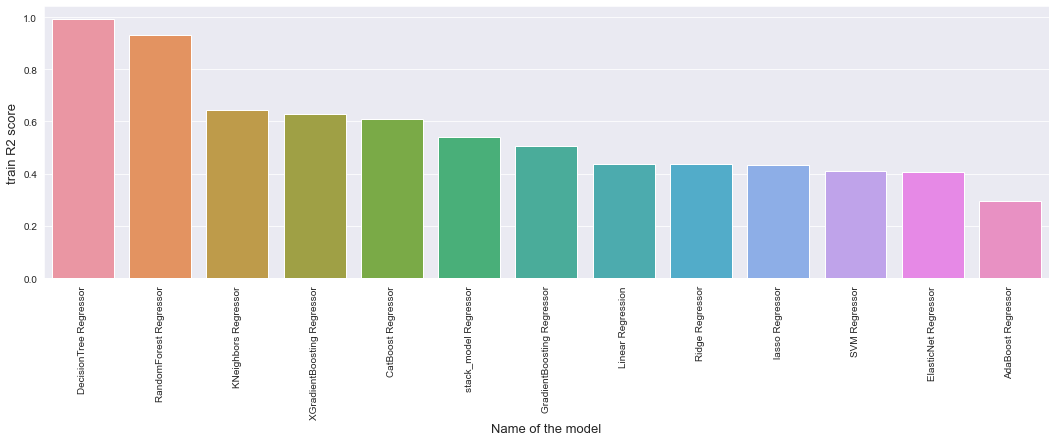

In [53]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,5))
sns.barplot(score_card_train['Model_Name'],score_card_train['Adj. R-Squared_train'])
plt.xlabel('Name of the model',fontsize=13)
plt.ylabel('train R2 score',fontsize=13)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
score_card_test

In [54]:
score_card_test = score_card_test.sort_values(by = 'Adj. R-Squared_test' , ascending  = False)
score_card_test

,Model_Name,R-Squared_test,Adj. R-Squared_test,RMSE_test
12,CatBoost Regressor,0.583365,0.583305,65.465657
6,XGradientBoosting Regressor,0.580661,0.580601,65.677748
2,RandomForest Regressor,0.566788,0.566726,66.755311
5,GradientBoosting Regressor,0.506868,0.506798,71.222480
11,stack_model Regressor,0.506338,0.506267,71.260758
4,KNeighbors Regressor,0.462180,0.462103,74.379629
0,Linear Regression,0.445173,0.445093,75.546528
7,Ridge Regressor,0.445172,0.445093,75.546534
8,lasso Regressor,0.438890,0.438810,75.973044
10,SVM Regressor,0.419836,0.419753,77.252205


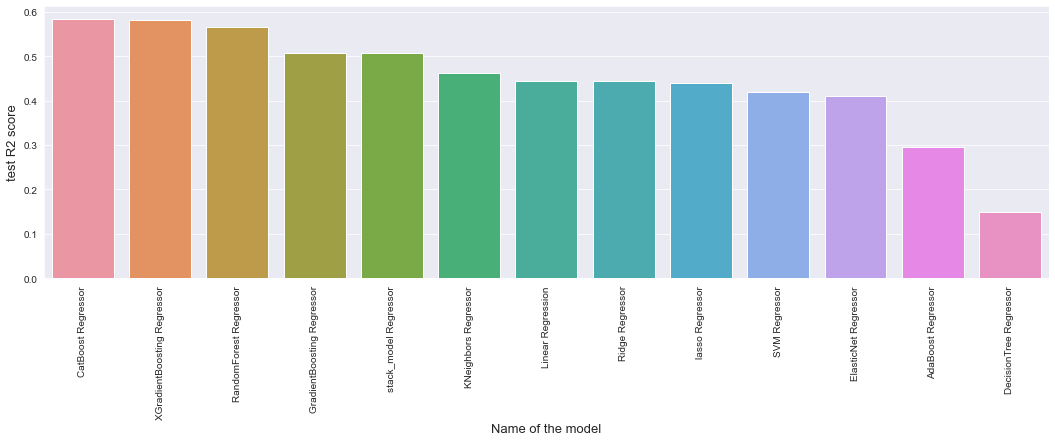

In [56]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,5))
sns.barplot(score_card_test['Model_Name'],score_card_test['Adj. R-Squared_test'])
plt.xlabel('Name of the model',fontsize=13)
plt.ylabel('test R2 score',fontsize=13)
plt.xticks(rotation = 90)
plt.show()

### Model building conclusion 

* Above table suggest that CatBoost indeed is working well for our problem. Hence making it our best fit model.
* It could be seen that all the ensemble techniques specially boosting algorithms are performing well. Out of 11 different algorithms used, CatBoost gave the best result with test 

<a id="best"></a>

### Best feature_importances

In [59]:
df_best_fea = pd.DataFrame(cb.feature_importances_, index = X_train.columns).sort_values(by = 0, ascending=False)
df_best_fea.rename(columns = {0: 'Feature Importance'}, inplace = True)
df_best_fea

,Feature Importance
calculated_host_listings_count,14.867842
accommodates,13.881170
calculated_host_listings_count_private_rooms,10.458267
bathrooms,8.974785
review_scores_value,7.669035
bedrooms,6.157541
review_scores_location,5.735396
availability_365,5.683183
review_scores_rating,5.307337
reviews_per_month,4.222777


### Following bar graph shows the features with their importance score. Higher bar suggests that the feature plays more part in predicting the target price